In [1]:
import pandas as pd
import wikidataintegrator as wdi

# Gottlieb et al 2011, PMID:21654673

This paper does predictions based on similarity of chemcial compounds. Question here is how reliable this approach is as small changes to a compound can substantially alter it's efficacy/target binding affinity

#### Indication gold standard file

In [2]:
ind_gold = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-1.xls', header=0)
ind_gold.count()

Drug name       1933
Disease name    1933
dtype: int64

In [3]:
len(ind_gold['Drug name'].value_counts())

593

In [4]:
len(ind_gold['Disease name'].value_counts())

313

#### Indication predictions for repositioning of approved drugs

In [5]:
repo_pred = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-2.xls', header=0)
repo_pred.count()

Score           9476
Drug name       9476
Disease name    9476
dtype: int64

In [6]:
len(repo_pred['Drug name'].value_counts())

580

In [7]:
len(repo_pred['Disease name'].value_counts())

305

#### Indication predictions for experimental compounds

In [8]:
exp_pred = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-3.xls', header=0)
exp_pred.count()

Score           3108
Drug name       3108
Disease name    3108
dtype: int64

In [9]:
len(exp_pred['Drug name'].value_counts())

369

In [10]:
len(exp_pred['Disease name'].value_counts())

253

In [11]:
exp_pred.head(100)

,Score,Drug name,Disease name
0,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Acroosteolysis With Osteoporosis And Changes I...
1,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Osteoporosis
2,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Inclusion Body Myopathy With Early-Onset Paget...
3,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Paget Disease Of Bone; Pdb
4,0.997898,3-Methylfentanyl,Insensitivity To Pain With Hyperplastic Myelin...
5,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Glaucoma 1, Open Angle, A; Glc1A"
6,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Glaucoma, Primary Open Angle; Poag"
7,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Renal Failure, Progressive, With Hypertension"
8,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Glaucoma 1, Open Angle, C; Glc1C"
9,0.997898,[1-Hydroxy-3-(Methyl-Pentyl-Amino)-1-Phosphono...,Acroosteolysis With Osteoporosis And Changes I...


In [12]:
omim_umls_map = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-4.xls', header=0)

In [13]:
omim_umls_map.head()

,OMIM ID,OMIM disease name,UMLS concept ID,UMLS concept name
0,102100,"Acromegaloid Changes, Cutis Verticis Gyrata, A...",C1868756,Corneal leukoma
1,102100,"Acromegaloid Changes, Cutis Verticis Gyrata, A...",C0263417,Cutis verticis gyrata
2,102300,"Restless Legs Syndrome, Susceptibility To, 1; ...",C0035258,Restless Legs Syndrome
3,102300,"Restless Legs Syndrome, Susceptibility To, 1; ...",C1876177,RLS1 (Ekbom Syndrome)
4,102400,Acroosteolysis,C0917990,Acroosteolysis (Acro-Osteolysis)


In [14]:
omim_umls_map.count()

OMIM ID              617
OMIM disease name    617
UMLS concept ID      617
UMLS concept name    617
dtype: int64

In [15]:
len(omim_umls_map['UMLS concept ID'].unique())

475

In [16]:
query = '''
select distinct ?d ?omim ?umls ?dLabel where { 
  {?d wdt:P492 ?omim .} UNION
  {?d wdt:P2892 ?umls .} 
  
   SERVICE wikibase:label { bd:serviceParam wikibase:language "en" . }  
}
group by ?d ?omim ?umls ?dLabel
'''

r = wdi.wdi_core.WDItemEngine.execute_sparql_query(query)

umls_map = {}
omim_map = {}
qid_disease_map = {}

for x in r['results']['bindings']:
    
    if 'umls' in x:
        umls_map.update({x['umls']['value']: x['d']['value']})
    elif 'omim' in x:
        omim_map.update({x['omim']['value']: x['d']['value']})
        
    if 'dLabel' in x:
        qid_disease_map.update({x['d']['value']: x['dLabel']['value']})
        


In [17]:
for c, x in omim_umls_map.iterrows():
    if x['UMLS concept ID'] in umls_map:
        omim_umls_map.loc[c, 'Wikidata'] = umls_map[x['UMLS concept ID']]
    else:
        print(x['UMLS concept ID'], 'not found in WD')
        
    if x['OMIM ID'] in omim_map and pd.isnull(omim_umls_map.loc[c, 'Wikidata']):
        omim_umls_map.loc[c, 'Wikidata'] = omim_map[x['OMIM ID']]
                                              

C1868756 not found in WD
C1876177 not found in WD
C1962963 not found in WD
C1563292 not found in WD
C0040416 not found in WD
C0001973 not found in WD
C1306341 not found in WD
C0553735 not found in WD
C0034219 not found in WD
C0870082 not found in WD
C1834057 not found in WD
C0240896 not found in WD
C0520679 not found in WD
C0004364 not found in WD
C0162311 not found in WD
C1303003 not found in WD
C0033377 not found in WD
C0007758 not found in WD
C0027066 not found in WD
C0037771 not found in WD
C0019204 not found in WD
C1512411 not found in WD
C1560249 not found in WD
C0205700 not found in WD
C1861864 not found in WD
C0042842 not found in WD
C0086543 not found in WD
C0151686 not found in WD
C1850258 not found in WD
C1456687 not found in WD
C1852587 not found in WD
C1852581 not found in WD
C0852949 not found in WD
C0333463 not found in WD
C0242422 not found in WD
C0342276 not found in WD
C1852093 not found in WD
C0342276 not found in WD
C1841962 not found in WD
C0265309 not found in WD


In [18]:
omim_umls_map.count()

OMIM ID              617
OMIM disease name    617
UMLS concept ID      617
UMLS concept name    617
Wikidata             324
dtype: int64

In [19]:
# drug_wd_map = {}
# compound_query = '''
# select * where { ?drug wdt:P2275 ?who . }
# '''

# response = wdi.wdi_core.WDItemEngine.execute_sparql_query(compound_query)
# for x in response['results']['bindings']:
#     drug_wd_map.update({x['who']['value'].lower(): x['drug']['value']})

# drug_query = '''
# SELECT * WHERE {
#     ?compound wdt:P2275 ?who_name FILTER (LANG(?who_name) = "en") .  
# }
# '''

# http://tinyurl.com/z6397rh
drug_query = '''
SELECT ?compound ?label ?who_name (GROUP_CONCAT(DISTINCT(?alias); separator="|") AS ?aliases) WHERE {{
  {{?compound wdt:P31 wd:Q11173 .}} UNION  # chemical compound
  {{?compound wdt:P31 wd:Q12140 .}} UNION  # pharmaceutical drug
  {{?compound wdt:P31 wd:Q79529 .}} UNION  # chemical substance
  {{?compound wdt:P2275 ?who_name FILTER (LANG(?who_name) = "en") .}}
  
  OPTIONAL {{
    ?compound rdfs:label ?label FILTER (LANG(?label) = "en") .
  }}
  OPTIONAL {{
    ?compound skos:altLabel ?alias FILTER (LANG(?alias) = "en") .
  }}
}}
GROUP BY ?compound ?label ?who_name ?aliases
OFFSET {0}
LIMIT 100000
'''


drug_qid_map = {}
qid_drug_map = {}

cc = 0
while True:
    r = wdi.wdi_core.WDItemEngine.execute_sparql_query(query=drug_query.format(100000 * cc))
    cc += 1
    
    if len(r['results']['bindings']) == 0:
        break
    
    for x in r['results']['bindings']:
        qid = x['compound']['value']
        qid_drug_map.update({qid: {
            'who_name': None,
            'label': None,
            'aliases': None
        }})
        
        if 'who_name' in x:
            drug_qid_map.update({x['who_name']['value'].lower(): qid})
            qid_drug_map[qid]['who_name'] = x['who_name']['value'].lower()
            
        if 'label' in x:
            drug_qid_map.update({x['label']['value'].lower(): qid})
            qid_drug_map[qid]['label'] = x['label']['value'].lower()
            
        if 'aliases' in x:
            drug_qid_map.update({y.lower(): qid for y in x['aliases']['value'].split('|')})
            qid_drug_map[qid]['aliases'] = [y for y in x['aliases']['value'].split('|')]
        
#         count += 1
            
print('Drug to QID map has {} entries!'.format(len(drug_qid_map)))

Drug to QID map has 274702 entries!


In [20]:
repo_pred.head()

,Score,Drug name,Disease name
0,0.996645,Gonadorelin,"Endometriosis, Susceptibility To, 1"
1,0.996645,Escitalopram,Alcohol Dependence
2,0.996645,Escitalopram,Encephalopathy With Intracranial Calcification...
3,0.996645,Gonadorelin,"Pyogenic Sterile Arthritis, Pyoderma Gangrenos..."
4,0.996645,Levofloxacin,"Helicobacter Pylori Infection, Susceptibility To"


In [21]:
missing_drug = set()
for c, x in repo_pred.iterrows():
    if not x['Disease name'] in omim_umls_map['OMIM disease name'].values:
        print(x['Disease name'], 'not found', end=' ')
        
    if not x['Drug name'].lower() in drug_qid_map:
        print(x['Drug name'], 'not found')
        missing_drug.add(x['Drug name'].lower())
        
print(missing_drug)

# missing_manual_dict = {'ethacrynic acid': 'Q418571', 'nitroglycerin': 'Q162867', 'ethinyl estradiol', 'apomorphine', 'dyphylline',
#                        'amphetamine', 'alendronate', 'meperidine', 'levothyroxine', 'vinorelbine', 
#                        'divalproex sodium', 'cyclosporine', 'l-carnitine', 'diphenidol', 'sucralfate', 
#                        'enoxaparin', 'ranitidine', 'pamidronate', 'valrubicin', 'lisinopril', 'cocaine', 
#                        'theophylline', 'isoetharine', 'vasopressin', 'magnesium', 'porfimer', 'metyrosine', 
#                        'salmon calcitonin', 'fumarate', 'propoxyphene', 'methimazole', 'desmopressin', 'fludrocortisone',
#                        'conjugated estrogens', 'choline', 'halobetasol propionate', 'acetaminophen', 'beclomethasone', 
#                        'argatroban', 'glucosamine', 'flurandrenolide', 'epoprostenol', 'isoproterenol', 
#                        'pyridoxal phosphate', 'neostigmine', 'palmitic acid', 'benztropine', 'levetiracetam', 
#                        'methotrimeprazine', 'vitamin c', 'hyoscyamine', 'pentosan polysulfate', 'thioguanine', 
#                        'pilocarpine', 'leucovorin', 'norethindrone', 'guanadrel sulfate', 'tramadol', 'octreotide', 
#                        'mercaptopurine', 'l-alanine', 'mitomycin', 'zoledronate', 'bismuth', 'phenylpropanolamine', 
#                        'dipivefrin', 'heparin', 'leuprolide', 'adenosine monophosphate', 'vitamin a', 'aspirin', 
#                        'dextromethorphan', 'thiothixene', 'colchicine', 'quinidine', 'citric acid', 'trandolapril', 
#                        'diethylpropion', 'l-isoleucine', 'methylergonovine', 'vitamin e', 'cromoglicate', 'hydroxyurea', 
#                        'glimepiride', 'quinine', 'caffeine', 'urea', 'chlorthalidone', 'morphine', 'ardeparin', 'fosinopril', 
#                        'dextroamphetamine', 'magnesium sulfate', 'sermorelin', 'ipratropium', 'doxepin', 'fluticasone propionate', 
#                        'salicyclic acid', 'methamphetamine', 'ethanol', 'scopolamine', 'risedronate', 
#                        'clidinium', 'gonadorelin', 'ambenonium', 'indomethacin', 'tiludronate', 'guanidine', 'dicyclomine', 
#                        'benzphetamine', 'pyridostigmine', 'niacin', 'vinblastine', 'bethanechol', 'cholecalciferol'}

Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Ardeparin not found
Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Salicyclic Acid not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone

In [22]:
print(len(missing_drug))
print(omim_umls_map.loc[omim_umls_map['OMIM disease name'].isin([x['Disease name']]), 'OMIM disease name'])

18
482    Epilepsy, X-Linked, With Variable Learning Dis...
483    Epilepsy, X-Linked, With Variable Learning Dis...
Name: OMIM disease name, dtype: object


In [23]:
for c, x in repo_pred.iterrows():
    if x['Disease name'] in omim_umls_map['OMIM disease name'].values:
        repo_pred.loc[c, 'disease_qid'] = omim_umls_map.loc[omim_umls_map['OMIM disease name'].isin([x['Disease name']]), 'Wikidata'].values[0]
        
    if x['Drug name'].lower() in drug_qid_map:
        repo_pred.loc[c, 'drug_qid'] = drug_qid_map[x['Drug name'].lower()]
        
    

In [24]:
repo_pred.head()

,Score,Drug name,Disease name,disease_qid,drug_qid
0,0.996645,Gonadorelin,"Endometriosis, Susceptibility To, 1",http://www.wikidata.org/entity/Q205764,http://www.wikidata.org/entity/Q20817116
1,0.996645,Escitalopram,Alcohol Dependence,NaN,http://www.wikidata.org/entity/Q423757
2,0.996645,Escitalopram,Encephalopathy With Intracranial Calcification...,http://www.wikidata.org/entity/Q576349,http://www.wikidata.org/entity/Q423757
3,0.996645,Gonadorelin,"Pyogenic Sterile Arthritis, Pyoderma Gangrenos...",http://www.wikidata.org/entity/Q79928,http://www.wikidata.org/entity/Q20817116
4,0.996645,Levofloxacin,"Helicobacter Pylori Infection, Susceptibility To",NaN,http://www.wikidata.org/entity/Q424193


In [25]:
def get_wd_label(qid):
    item = wdi.wdi_core.WDItemEngine(wd_item_id=qid)
    
    return item.get_label()

In [26]:
for c, x in repo_pred.iterrows():
    if pd.notnull(x['disease_qid']):
        repo_pred.loc[c, 'wd_disease_label'] = qid_disease_map[x['disease_qid']]
    
    if pd.notnull(x['drug_qid']):
        repo_pred.loc[c, 'wd_drug_label'] = qid_drug_map[x['drug_qid']]['label']
        
#     if c % 100 == 0:
#         print('current count', c)

In [27]:
repo_pred.head()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label
0,0.996645,Gonadorelin,"Endometriosis, Susceptibility To, 1",http://www.wikidata.org/entity/Q205764,http://www.wikidata.org/entity/Q20817116,endometriosis,gonadorelin
1,0.996645,Escitalopram,Alcohol Dependence,NaN,http://www.wikidata.org/entity/Q423757,NaN,escitalopram
2,0.996645,Escitalopram,Encephalopathy With Intracranial Calcification...,http://www.wikidata.org/entity/Q576349,http://www.wikidata.org/entity/Q423757,brain disease,escitalopram
3,0.996645,Gonadorelin,"Pyogenic Sterile Arthritis, Pyoderma Gangrenos...",http://www.wikidata.org/entity/Q79928,http://www.wikidata.org/entity/Q20817116,acne,gonadorelin
4,0.996645,Levofloxacin,"Helicobacter Pylori Infection, Susceptibility To",NaN,http://www.wikidata.org/entity/Q424193,NaN,levofloxacin anhydrous


In [28]:
repo_pred.count()

Score               9476
Drug name           9476
Disease name        9476
disease_qid         5638
drug_qid            9244
wd_disease_label    5638
wd_drug_label       9244
dtype: int64

In [29]:
gottlieb_pmid = '21654673'

## Map experimental compound predictions

In [30]:
for c, x in exp_pred.iterrows():
    if x['Disease name'] in omim_umls_map['OMIM disease name'].values:
        exp_pred.loc[c, 'disease_qid'] = omim_umls_map.loc[omim_umls_map['OMIM disease name'].isin([x['Disease name']]), 'Wikidata'].values[0]
        
    if x['Drug name'].lower() in drug_qid_map:
        exp_pred.loc[c, 'drug_qid'] = drug_qid_map[x['Drug name'].lower()]

In [31]:
exp_pred.count()

Score           3108
Drug name       3108
Disease name    3108
disease_qid     1843
drug_qid        2434
dtype: int64

In [32]:
exp_pred.head()

,Score,Drug name,Disease name,disease_qid,drug_qid
0,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Acroosteolysis With Osteoporosis And Changes I...,http://www.wikidata.org/entity/Q632228,NaN
1,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Osteoporosis,http://www.wikidata.org/entity/Q165328,NaN
2,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Inclusion Body Myopathy With Early-Onset Paget...,NaN,NaN
3,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Paget Disease Of Bone; Pdb,http://www.wikidata.org/entity/Q2035074,NaN
4,0.997898,3-Methylfentanyl,Insensitivity To Pain With Hyperplastic Myelin...,NaN,http://www.wikidata.org/entity/Q2030844


In [33]:
for c, x in exp_pred.iterrows():
    if pd.notnull(x['disease_qid']):
        exp_pred.loc[c, 'wd_disease_label'] = qid_disease_map[x['disease_qid']]
    
    if pd.notnull(x['drug_qid']):
        exp_pred.loc[c, 'wd_drug_label'] = qid_drug_map[x['drug_qid']]['label']
        

In [34]:
exp_pred.head()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label
0,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Acroosteolysis With Osteoporosis And Changes I...,http://www.wikidata.org/entity/Q632228,NaN,Hajdu-Cheney syndrome,NaN
1,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Osteoporosis,http://www.wikidata.org/entity/Q165328,NaN,osteoporosis,NaN
2,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Inclusion Body Myopathy With Early-Onset Paget...,NaN,NaN,NaN,NaN
3,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Paget Disease Of Bone; Pdb,http://www.wikidata.org/entity/Q2035074,NaN,Paget's disease of bone,NaN
4,0.997898,3-Methylfentanyl,Insensitivity To Pain With Hyperplastic Myelin...,NaN,http://www.wikidata.org/entity/Q2030844,NaN,3-methylfentanyl


In [35]:
exp_pred.to_csv('./paper_data/Gottlieb et al 2011 PMID:21654673/exp_pred_wd_annotated.csv')

In [36]:
final_list = []
for c, x in repo_pred.iterrows():
    if pd.notnull(x['disease_qid']) and pd.notnull(x['drug_qid']):
        final_list.append({
            'Drug name': x['Drug name'],
            'Disease name': x['Disease name'],
            'disease_qid': x['disease_qid'],
            'drug_qid': x['drug_qid']
        })


In [37]:
len(final_list)

5504

In [38]:
import pprint
pprint.pprint(final_list, width=180)

[{'Disease name': 'Endometriosis, Susceptibility To, 1',
  'Drug name': 'Gonadorelin',
  'disease_qid': 'http://www.wikidata.org/entity/Q205764',
  'drug_qid': 'http://www.wikidata.org/entity/Q20817116'},
 {'Disease name': 'Encephalopathy With Intracranial Calcification, Growth Hormone Deficiency,',
  'Drug name': 'Escitalopram',
  'disease_qid': 'http://www.wikidata.org/entity/Q576349',
  'drug_qid': 'http://www.wikidata.org/entity/Q423757'},
 {'Disease name': 'Pyogenic Sterile Arthritis, Pyoderma Gangrenosum, And Acne',
  'Drug name': 'Gonadorelin',
  'disease_qid': 'http://www.wikidata.org/entity/Q79928',
  'drug_qid': 'http://www.wikidata.org/entity/Q20817116'},
 {'Disease name': 'Acroosteolysis With Osteoporosis And Changes In Skull And Mandible',
  'Drug name': 'Levonorgestrel',
  'disease_qid': 'http://www.wikidata.org/entity/Q632228',
  'drug_qid': 'http://www.wikidata.org/entity/Q416950'},
 {'Disease name': 'Leiomyoma, Uterine; Ul',
  'Drug name': 'Gonadorelin',
  'disease_qid

In [39]:
final_list = []
for c, x in exp_pred.iterrows():
    if pd.notnull(x['disease_qid']) and pd.notnull(x['drug_qid']):
        final_list.append({
            'Drug name': x['Drug name'],
            'Disease name': x['Disease name'],
            'disease_qid': x['disease_qid'],
            'drug_qid': x['drug_qid']
        })
        
pprint.pprint(final_list, width=200)

[{'Disease name': 'Glaucoma 1, Open Angle, A; Glc1A',
  'Drug name': '(4S-Trans)-4-(Methylamino)-5,6-Dihydro-6-Methyl-4H-Thieno(2,3-B)Thiopyran-2-Sulfonamide-7,7-Dioxide',
  'disease_qid': 'http://www.wikidata.org/entity/Q3108586',
  'drug_qid': 'http://www.wikidata.org/entity/Q27094929'},
 {'Disease name': 'Glaucoma, Primary Open Angle; Poag',
  'Drug name': '(4S-Trans)-4-(Methylamino)-5,6-Dihydro-6-Methyl-4H-Thieno(2,3-B)Thiopyran-2-Sulfonamide-7,7-Dioxide',
  'disease_qid': 'http://www.wikidata.org/entity/Q18553921',
  'drug_qid': 'http://www.wikidata.org/entity/Q27094929'},
 {'Disease name': 'Glaucoma 1, Open Angle, C; Glc1C',
  'Drug name': '(4S-Trans)-4-(Methylamino)-5,6-Dihydro-6-Methyl-4H-Thieno(2,3-B)Thiopyran-2-Sulfonamide-7,7-Dioxide',
  'disease_qid': 'http://www.wikidata.org/entity/Q3108586',
  'drug_qid': 'http://www.wikidata.org/entity/Q27094929'},
 {'Disease name': 'Hypoparathyroidism, Sensorineural Deafness, And Renal Disease',
  'Drug name': 'Alfacalcidol',
  'disease

# Issa et al 2016, PMID:27151405

In [40]:
issa_data = pd.read_excel('./paper_data/Issa et al 2016 data PMID:27151405/12859_2016_1065_MOESM1_ESM.xlsx', header=0)
issa_data.count()

Uniprot Accession       16383
PDB                     16383
DrugBank ID             16383
Genotype MIM            16383
Phenotype MIM Number    16383
Disease                 16383
dtype: int64

In [41]:
drugbank_query = '''
SELECT * WHERE {{
  ?compound wdt:P715 ?db .
}}

'''


drugbank_qid_map = {}

r = wdi.wdi_core.WDItemEngine.execute_sparql_query(query=drugbank_query)

for x in r['results']['bindings']:
    drugbank_qid_map.update({'DB' + x['db']['value']: x['compound']['value']})
    
len(drugbank_qid_map)


7166

In [42]:
issa_data.head()

,Uniprot Accession,PDB,DrugBank ID,Genotype MIM,Phenotype MIM Number,Disease
0,O14936,3MFS,DB03998,300172,300422,"FG syndrome 4, 300422"
1,O14936,3MFS,DB02010,300172,300422,"Mental retardation, with or without nystagmus,..."
2,O14936,3C0I,DB01629,300172,300422,"FG syndrome 4, 300422"
3,O14936,3C0I,DB00928,300172,300422,"Mental retardation, with or without nystagmus,..."
4,O14936,3C0I,DB00811,300172,300422,"Mental retardation, with or without nystagmus,..."


In [43]:
for c, x in issa_data.iterrows():
    if x['DrugBank ID'] in drugbank_qid_map:
        issa_data.loc[c, 'DrugBank WD'] = drugbank_qid_map[x['DrugBank ID']]
    
    omim_id = str(x['Phenotype MIM Number'])
    if omim_id in omim_map:
        
        issa_data.loc[c, 'OMIM WD'] = omim_map[omim_id]
        
        

In [44]:
issa_data.head()

,Uniprot Accession,PDB,DrugBank ID,Genotype MIM,Phenotype MIM Number,Disease,DrugBank WD,OMIM WD
0,O14936,3MFS,DB03998,300172,300422,"FG syndrome 4, 300422",http://www.wikidata.org/entity/Q27094854,http://www.wikidata.org/entity/Q530142
1,O14936,3MFS,DB02010,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q5957181,http://www.wikidata.org/entity/Q530142
2,O14936,3C0I,DB01629,300172,300422,"FG syndrome 4, 300422",http://www.wikidata.org/entity/Q27073979,http://www.wikidata.org/entity/Q530142
3,O14936,3C0I,DB00928,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q416451,http://www.wikidata.org/entity/Q530142
4,O14936,3C0I,DB00811,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q421862,http://www.wikidata.org/entity/Q530142


In [45]:
for c, x in issa_data.iterrows():
    if pd.notnull(x['OMIM WD']):
        issa_data.loc[c, 'wd_disease_label'] = qid_disease_map[x['OMIM WD']]
    
    if pd.notnull(x['DrugBank WD']) and x['DrugBank WD'] in qid_drug_map:
        issa_data.loc[c, 'wd_drug_label'] = qid_drug_map[x['DrugBank WD']]['label']
        

In [46]:
issa_data.head()

,Uniprot Accession,PDB,DrugBank ID,Genotype MIM,Phenotype MIM Number,Disease,DrugBank WD,OMIM WD,wd_disease_label,wd_drug_label
0,O14936,3MFS,DB03998,300172,300422,"FG syndrome 4, 300422",http://www.wikidata.org/entity/Q27094854,http://www.wikidata.org/entity/Q530142,FG syndrome,[2-(methyleneamine)-4-(4-hydroxy-benzylidine)-...
1,O14936,3MFS,DB02010,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q5957181,http://www.wikidata.org/entity/Q530142,FG syndrome,staurosporine
2,O14936,3C0I,DB01629,300172,300422,"FG syndrome 4, 300422",http://www.wikidata.org/entity/Q27073979,http://www.wikidata.org/entity/Q530142,FG syndrome,5-fluorouridine
3,O14936,3C0I,DB00928,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q416451,http://www.wikidata.org/entity/Q530142,FG syndrome,azacitidine
4,O14936,3C0I,DB00811,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q421862,http://www.wikidata.org/entity/Q530142,FG syndrome,ribavirin


In [47]:
issa_data.to_csv('issa_data.csv')

In [48]:
issa_drug_disease_set = set()
gottlieb_drug_disease_set = set()

for c, x in issa_data.iterrows():
    db = x['DrugBank WD']
    om = x['OMIM WD']
    
    if pd.notnull(db) and pd.notnull(om):
        issa_drug_disease_set.add((db, om))
        
for x in final_list:
    gottlieb_drug_disease_set.add((x['drug_qid'], x['disease_qid']))
    
print(len(issa_drug_disease_set))
print(len(gottlieb_drug_disease_set))


4996
1229


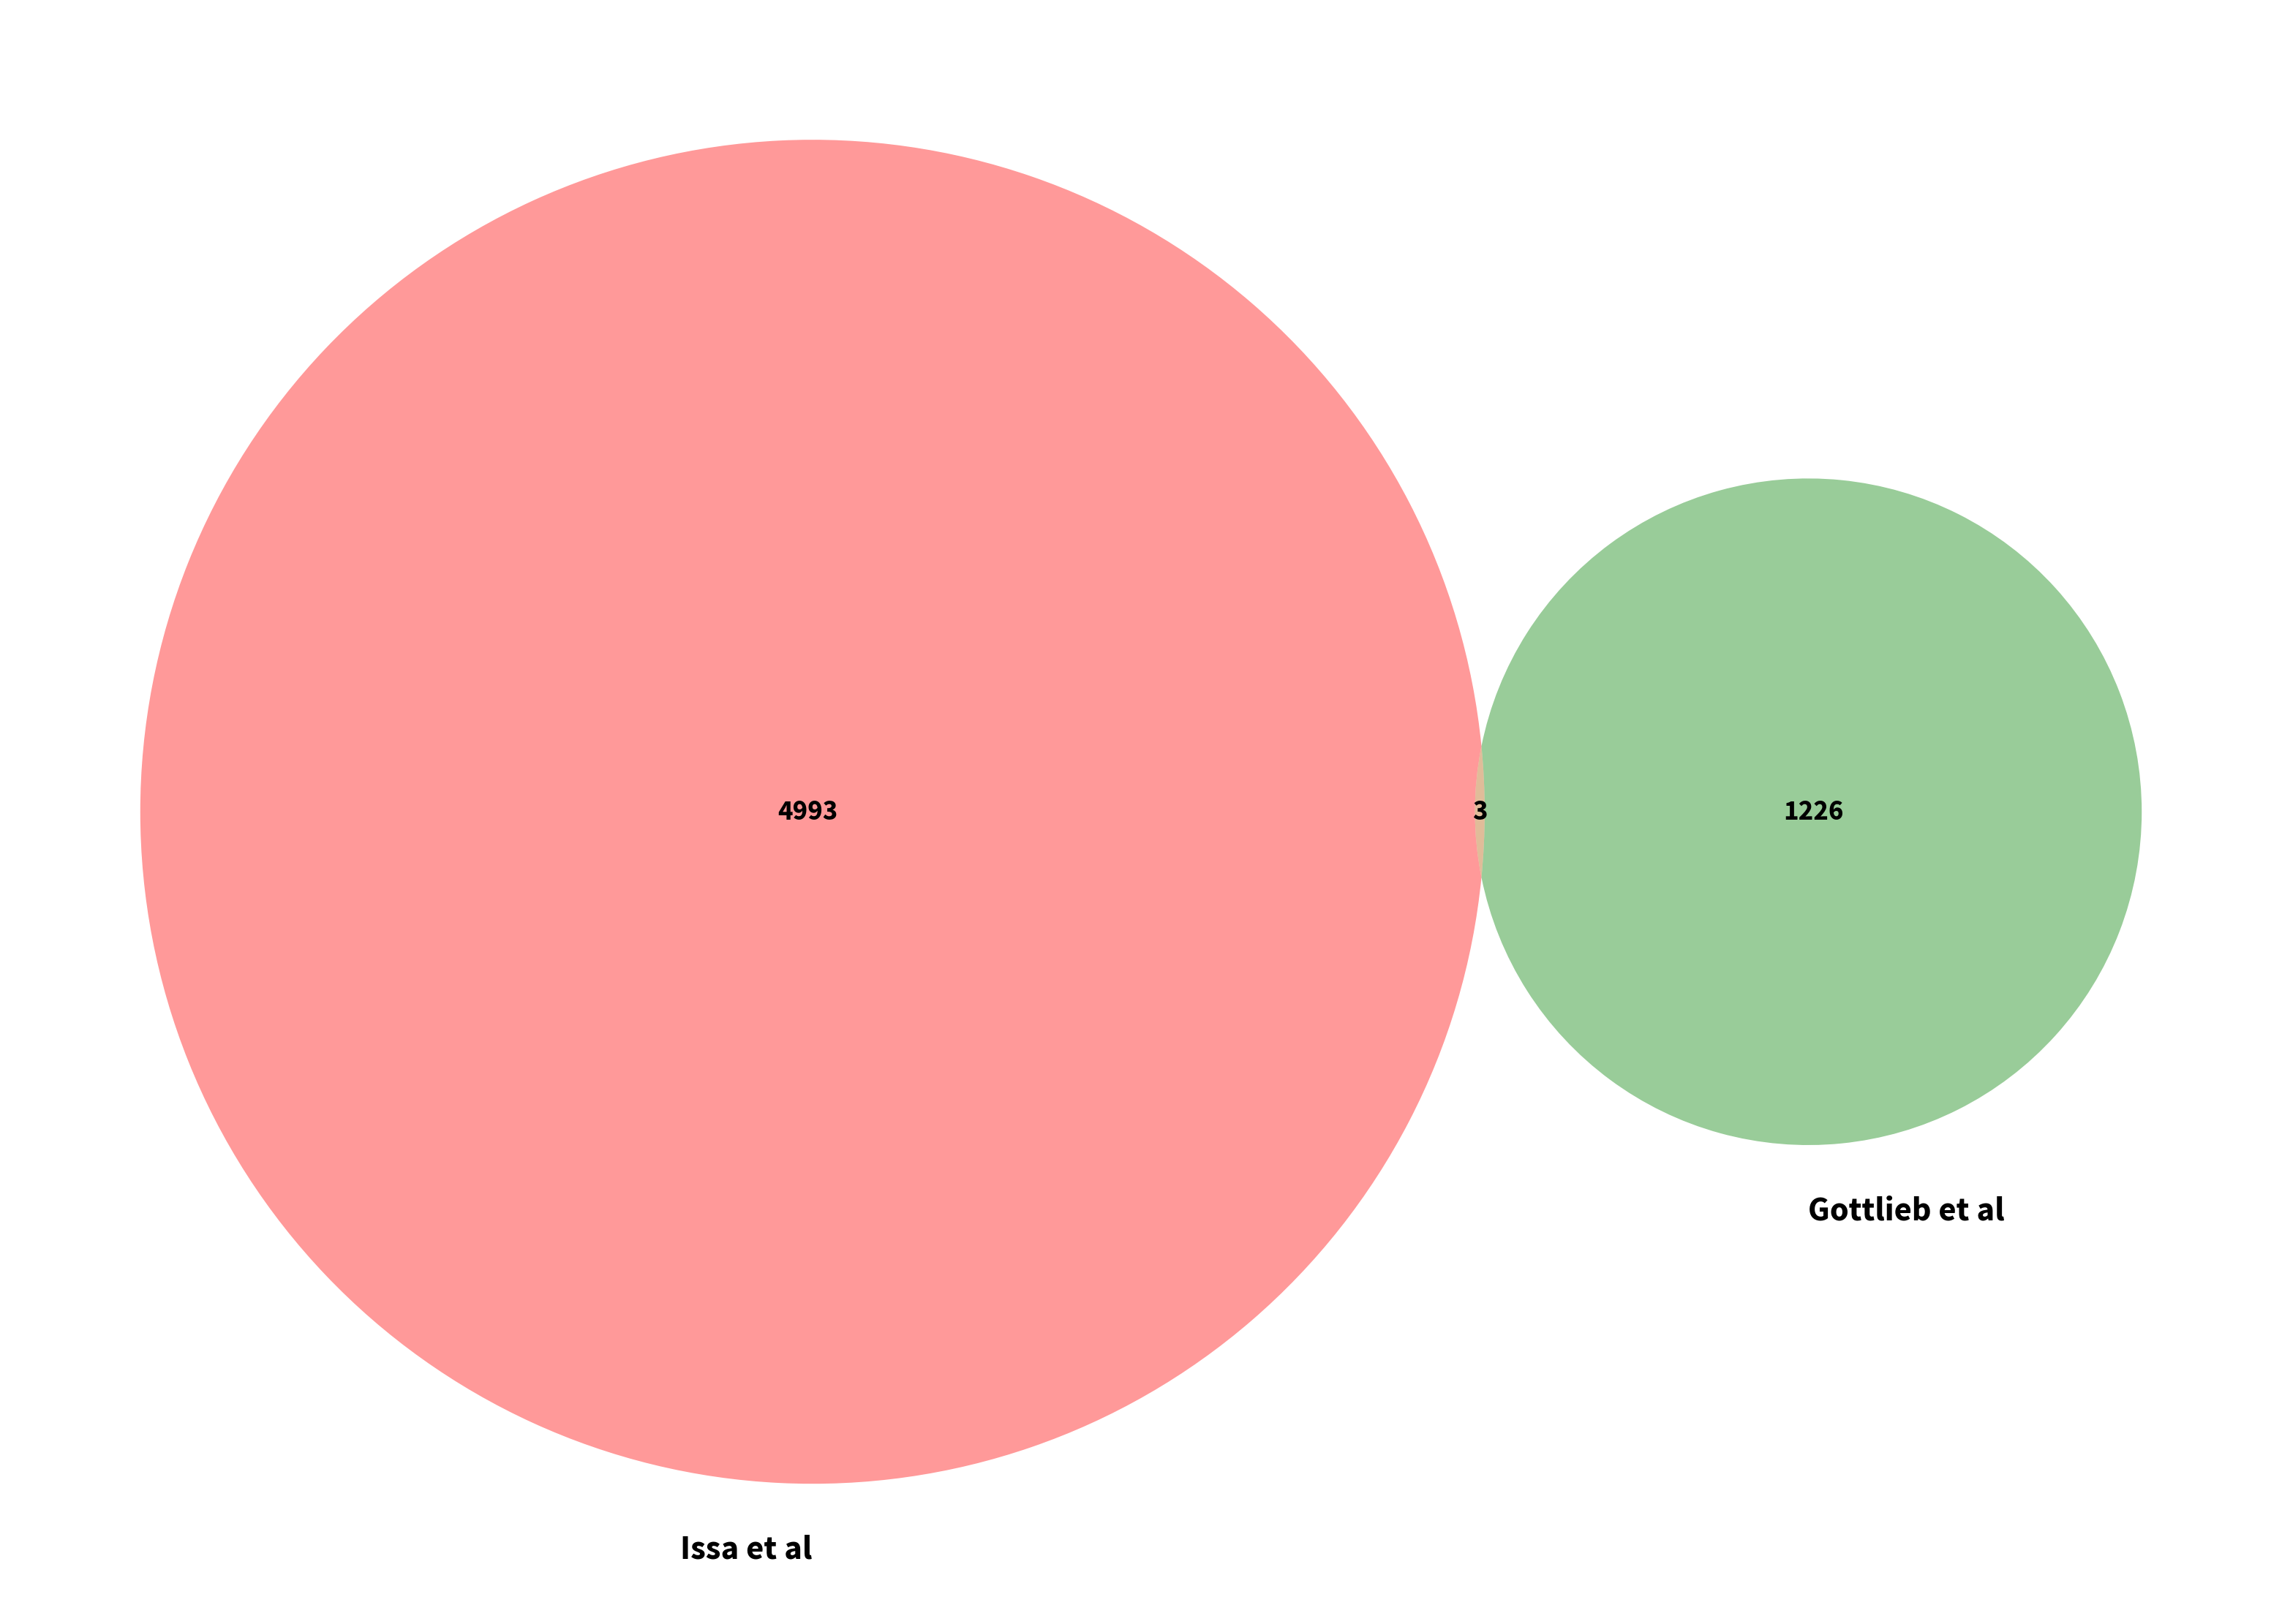

In [49]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib_venn import venn2, venn3

plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


venn2([issa_drug_disease_set, gottlieb_drug_disease_set], ('Issa et al', 'Gottlieb et al'))

plt.show()

In [50]:
pprint.pprint(issa_drug_disease_set.intersection(gottlieb_drug_disease_set))

{('http://www.wikidata.org/entity/Q4938950',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q554881',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q891284',
  'http://www.wikidata.org/entity/Q133823')}


All 3 are indications for migraine (Q133823), namely bolasterone (Q4938950), ethylmorphine (Q554881),  boldenone (Q891284) 

In [51]:
import json
with open('du_data.txt') as json_file:  
    du_data = json.load(json_file)
    
du_drug_disease_set = set()

for x in du_data:
    du_drug_disease_set.add((x['drug_qid'], x['disease_qid']))
    
print(len(du_drug_disease_set))

6071


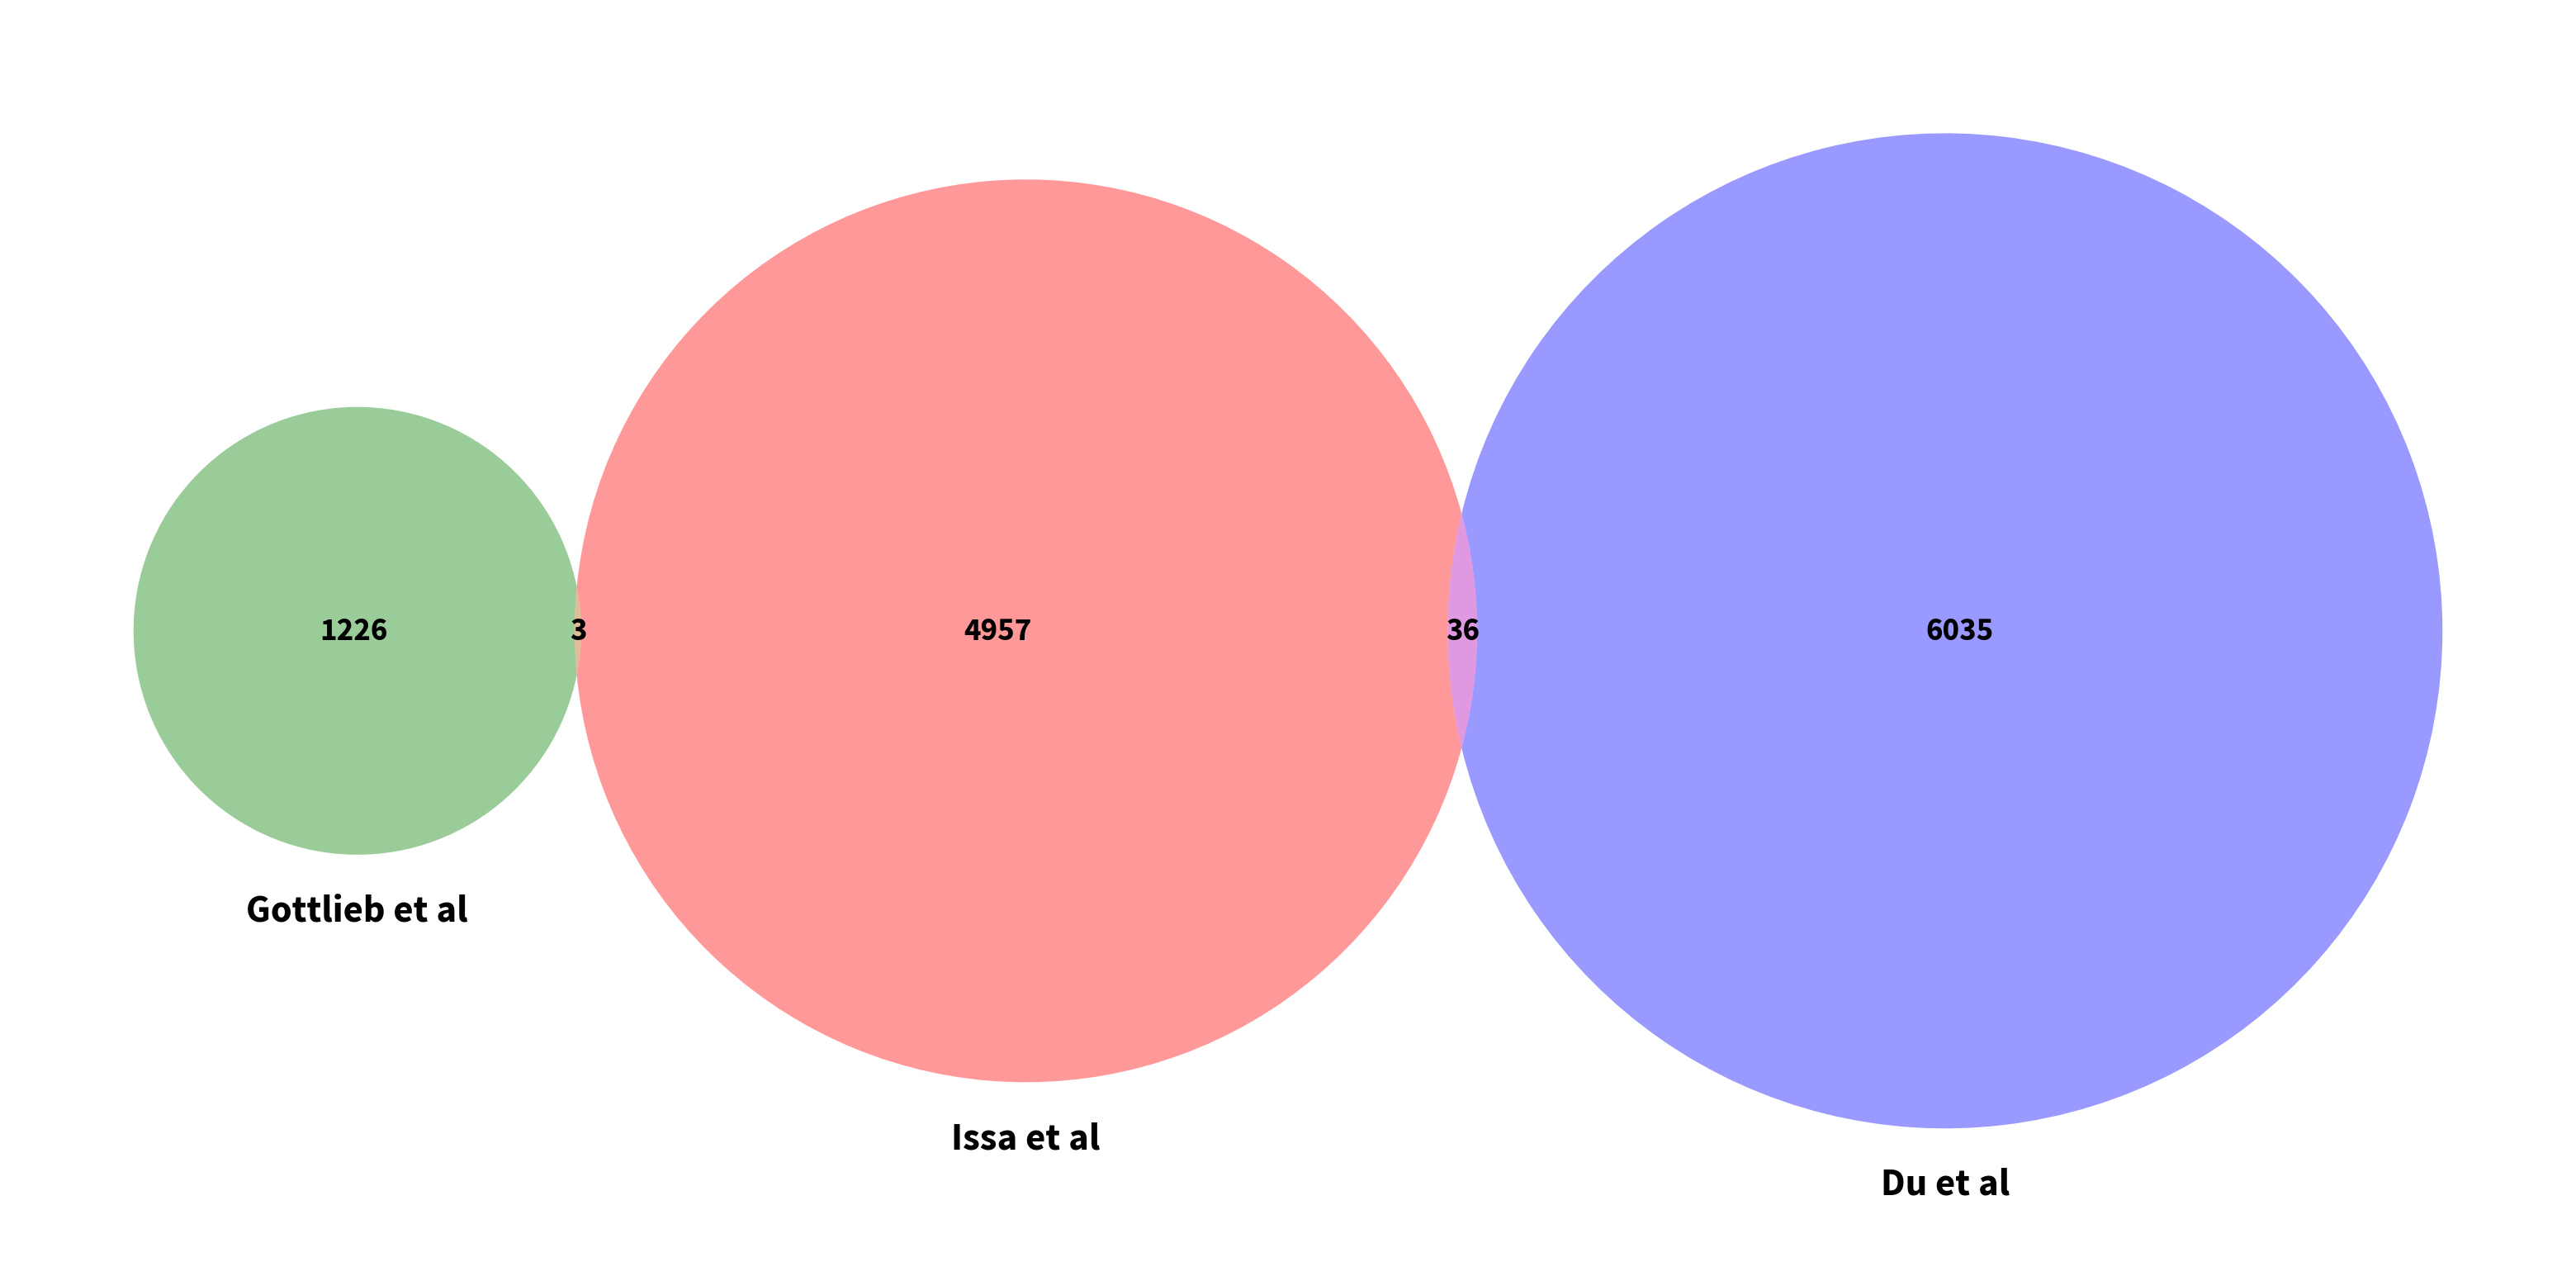

In [52]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


venn3([issa_drug_disease_set, gottlieb_drug_disease_set, du_drug_disease_set], ('Issa et al', 'Gottlieb et al', 'Du et al'))

plt.show()

In [53]:
pprint.pprint(issa_drug_disease_set.intersection(du_drug_disease_set))

{('http://www.wikidata.org/entity/Q177094',
  'http://www.wikidata.org/entity/Q47912'),
 ('http://www.wikidata.org/entity/Q2072745',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q221174',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q265352',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q27077098',
  'http://www.wikidata.org/entity/Q47912'),
 ('http://www.wikidata.org/entity/Q27093070',
  'http://www.wikidata.org/entity/Q7269853'),
 ('http://www.wikidata.org/entity/Q27093313',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q27093399',
  'http://www.wikidata.org/entity/Q7269853'),
 ('http://www.wikidata.org/entity/Q27093453',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q27093556',
  'http://www.wikidata.org/entity/Q10832211'),
 ('http://www.wikidata.org/entity/Q27094098',
  'http://www.wikidata.org/entity/Q7269853')

In [54]:
du_drugs = set()
issa_drugs =set()

for x in du_data:
    du_drugs.add((x['drug_qid']))
    
for c, x in issa_data.iterrows():
    db = x['DrugBank WD']
    om = x['OMIM WD']
    
    if pd.notnull(db):
        issa_drugs.add(db)
        


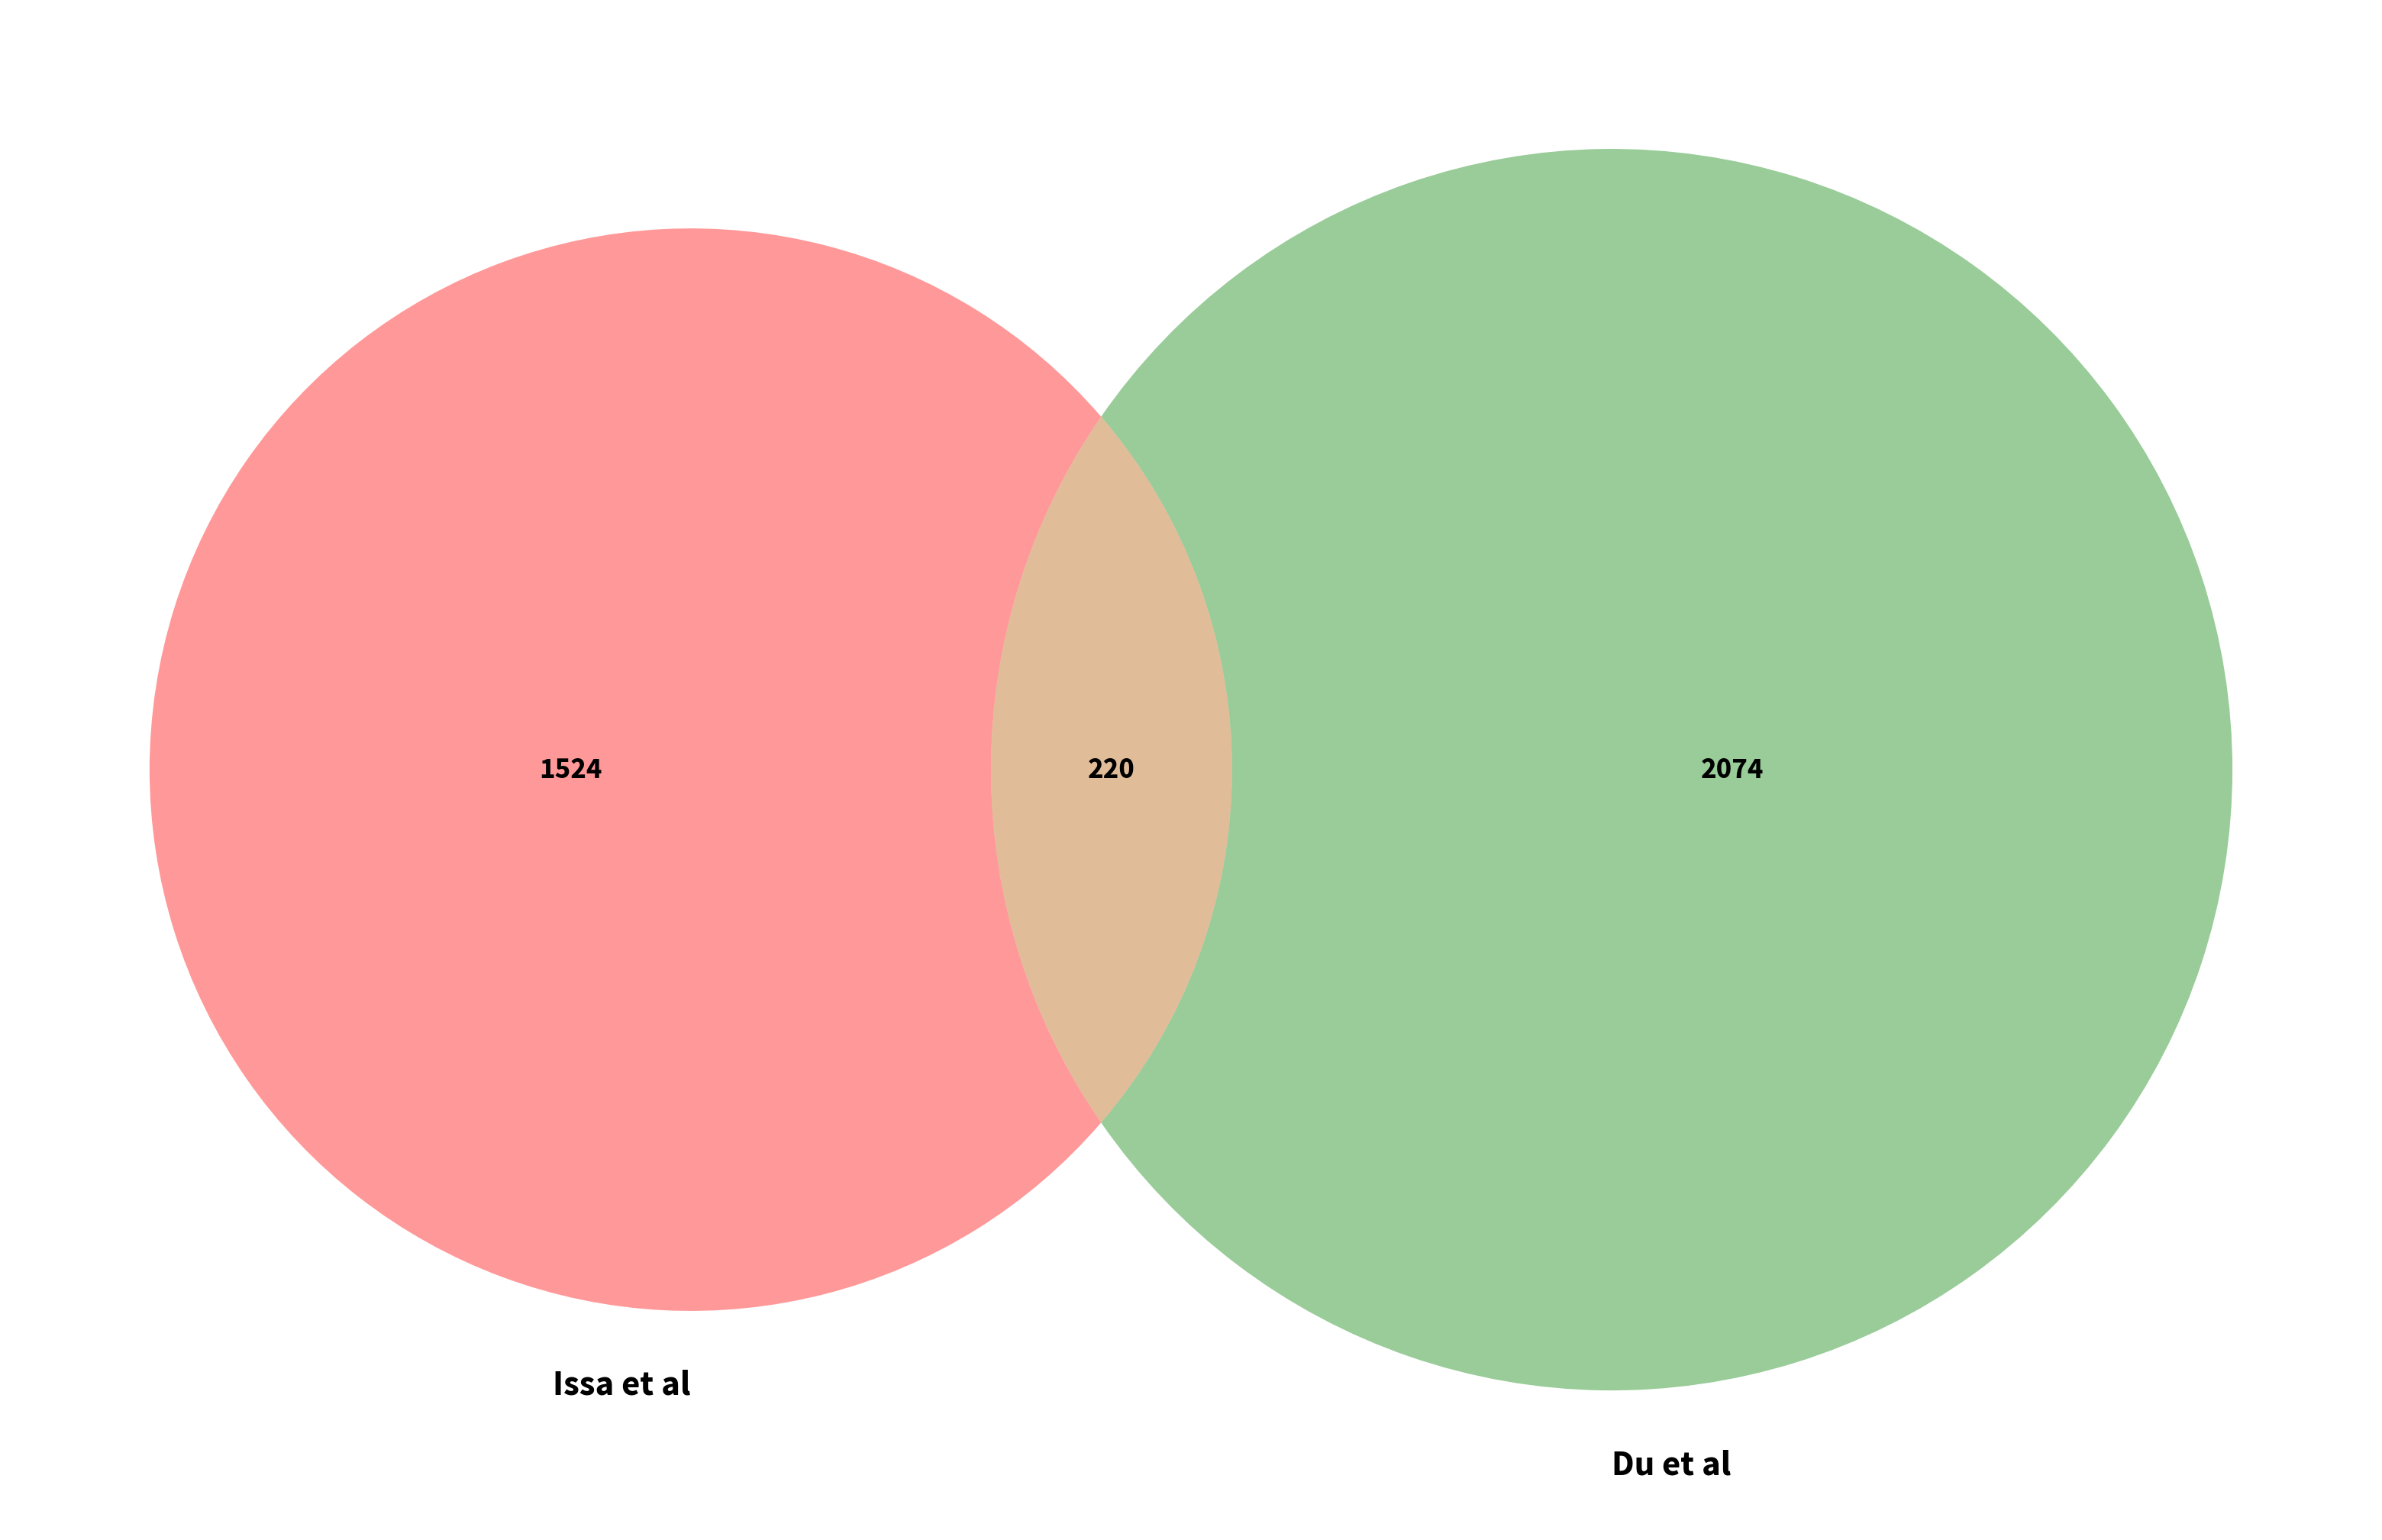

In [55]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


venn2([issa_drugs, du_drugs], ('Issa et al', 'Du et al'))

plt.show()

In [56]:
gottlieb_drugs = {x[0] for x in gottlieb_drug_disease_set}
gottlieb_diseases = {x[1] for x in gottlieb_drug_disease_set}

issa_diseases = {x[1] for x in issa_drug_disease_set}
du_diseases = {x[1] for x in du_drug_disease_set}

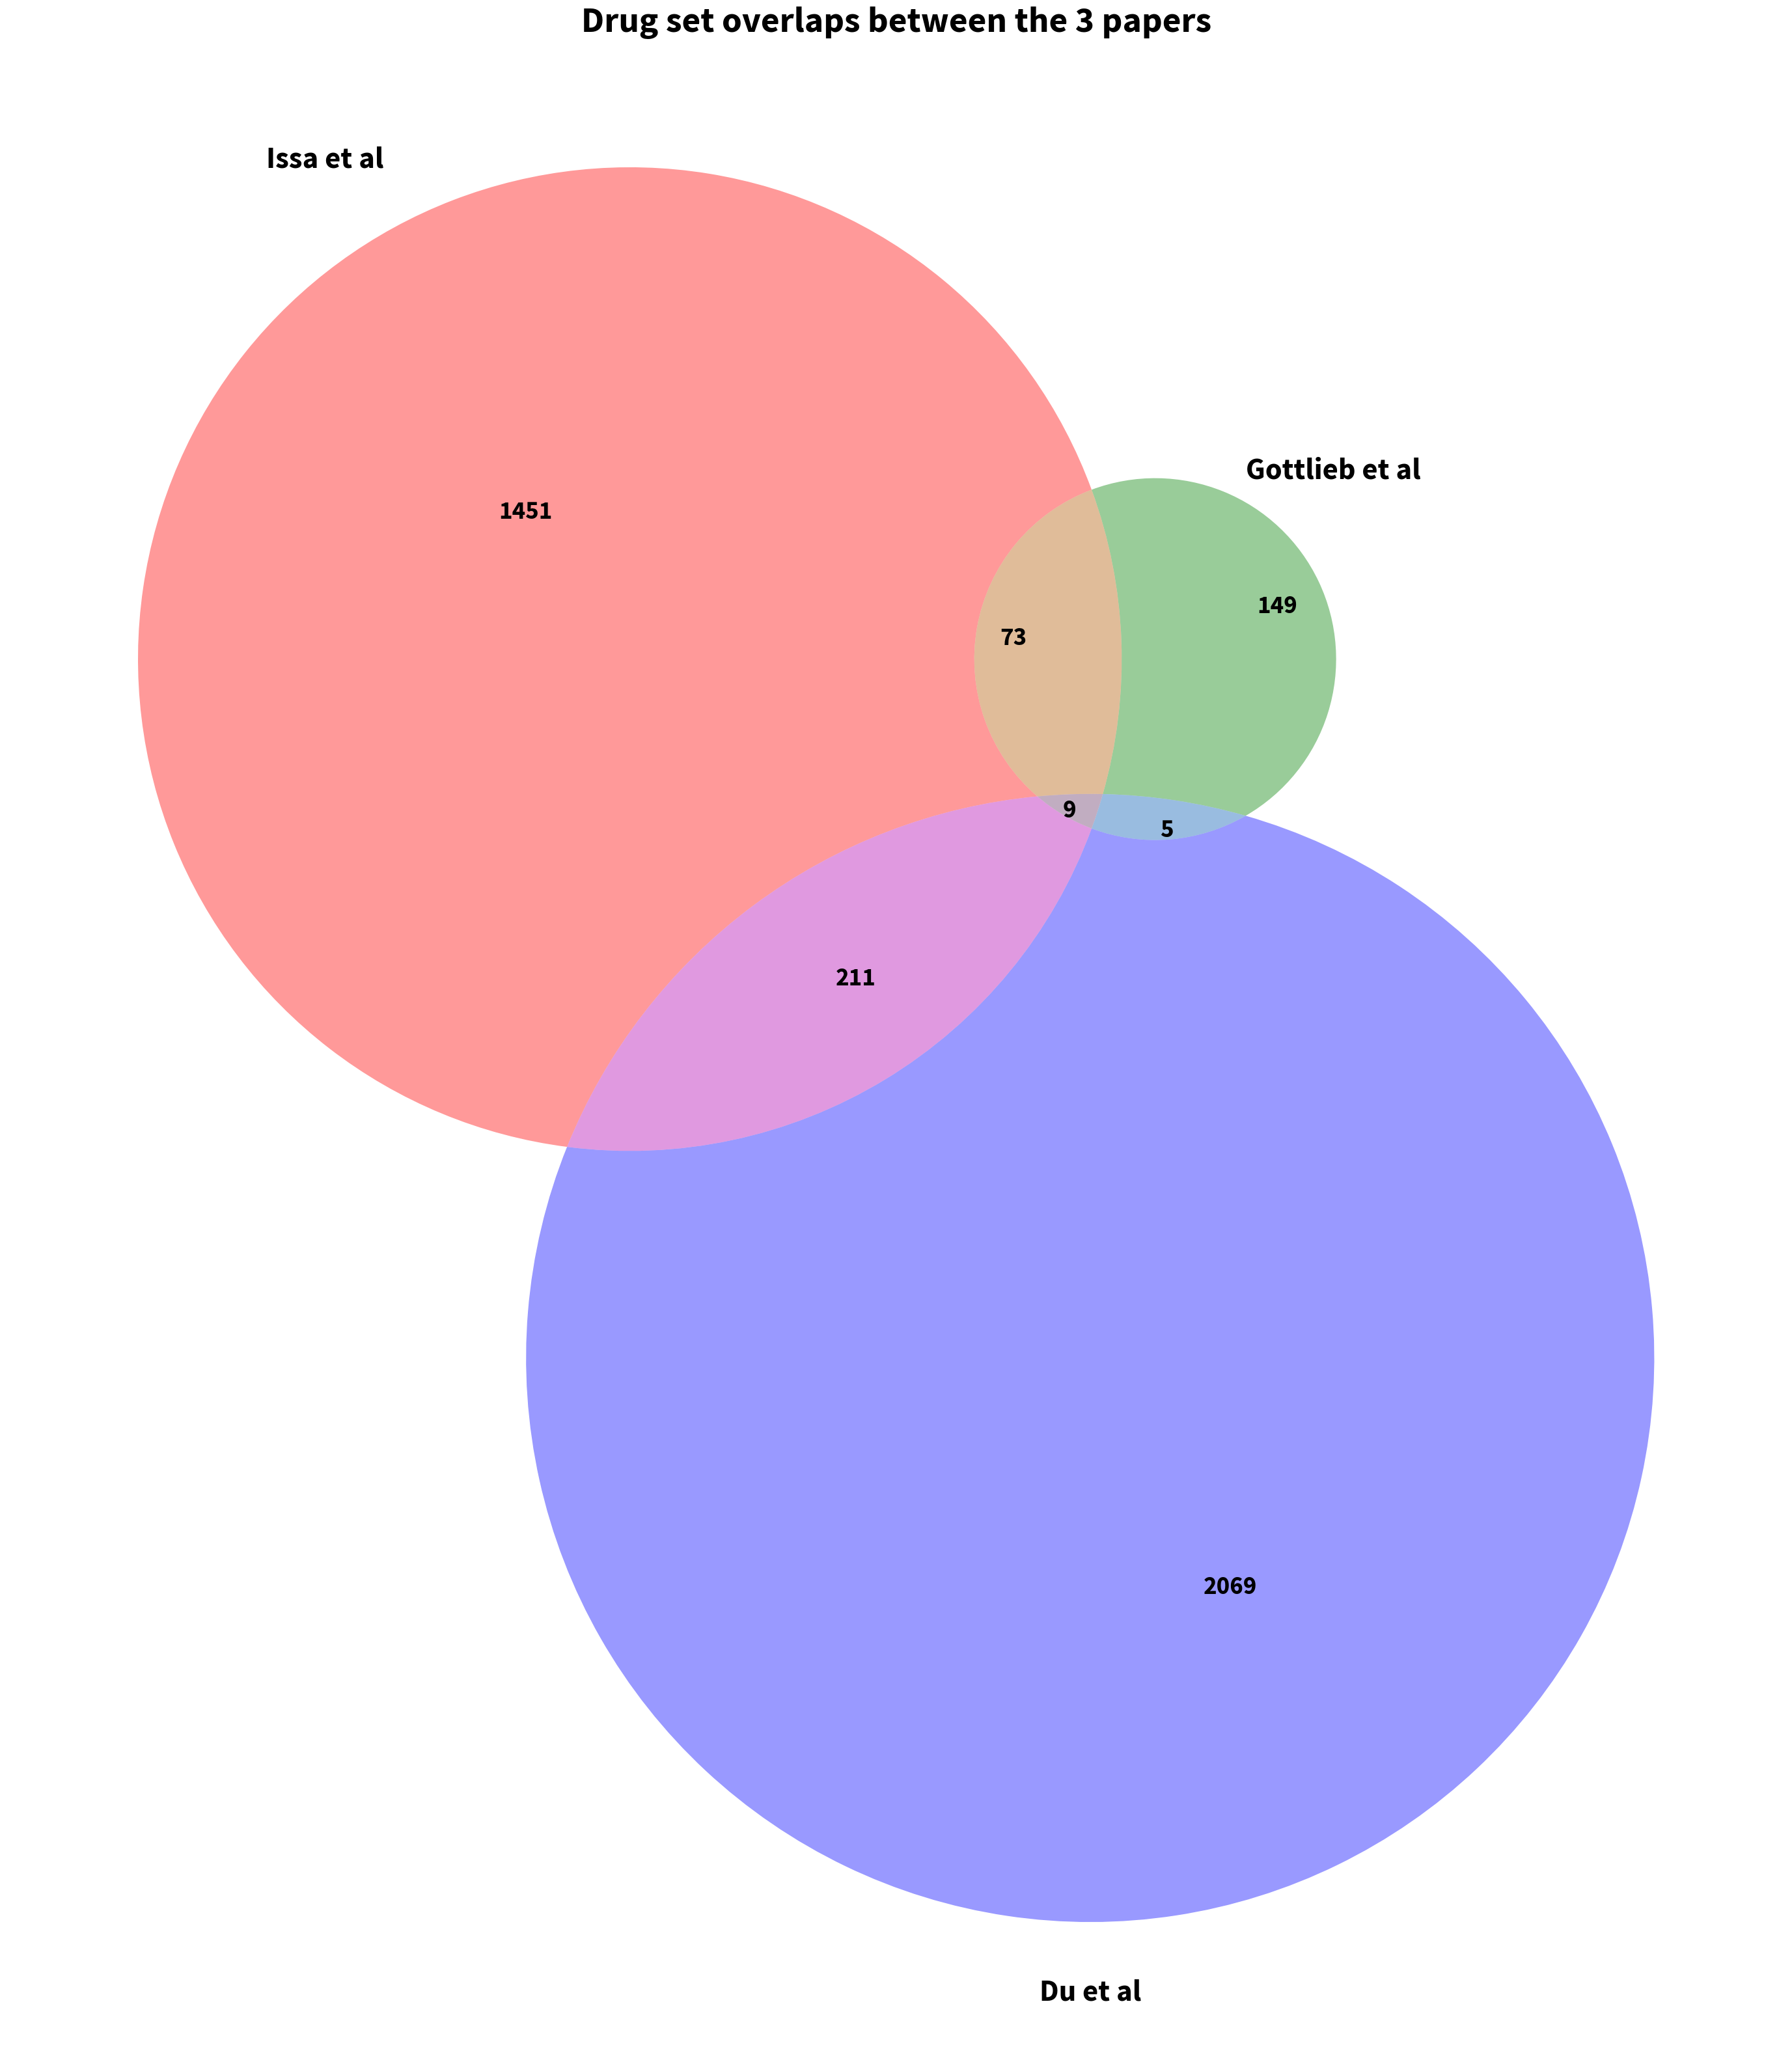

In [57]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

title_font = {'family' : 'Source Sans Pro', 
              'weight' : 'bold',
              'size'   : 40}

matplotlib.rc('font', **font)


venn3([issa_drugs, gottlieb_drugs, du_drugs], ('Issa et al', 'Gottlieb et al', 'Du et al'))

plt.title("Drug set overlaps between the 3 papers", fontdict=title_font)


plt.show()

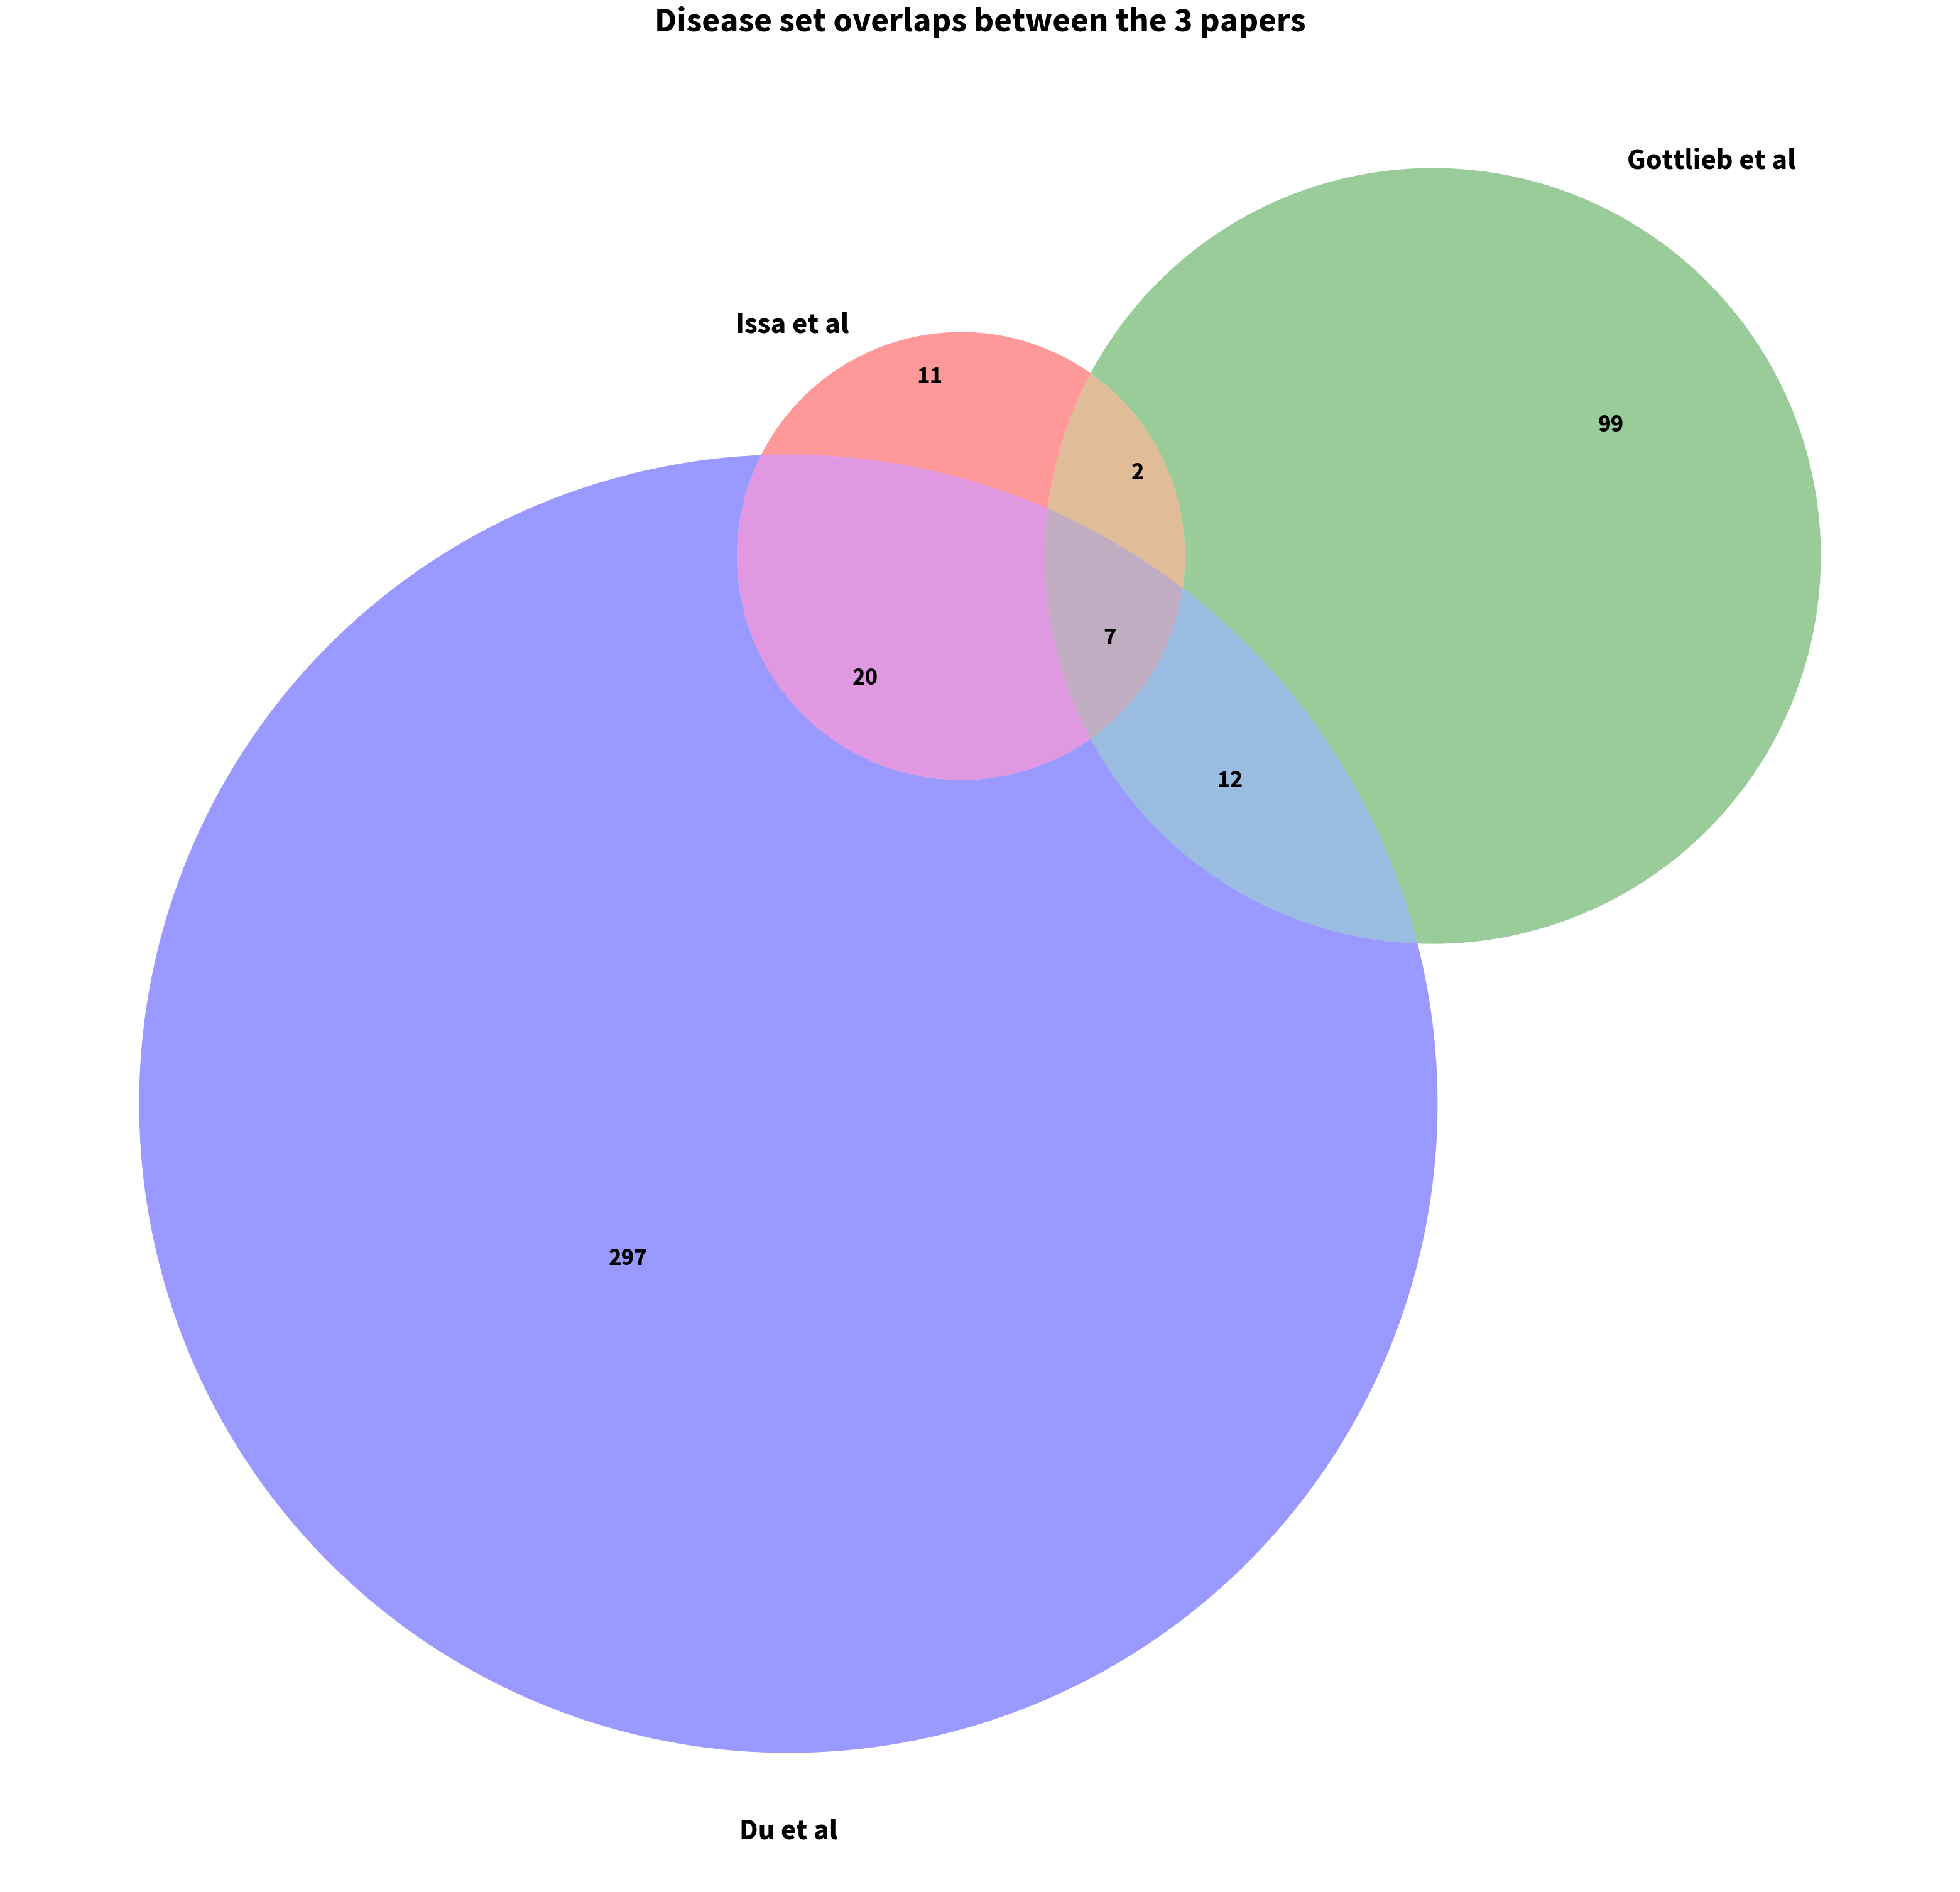

In [58]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

title_font = {'family' : 'Source Sans Pro', 
              'weight' : 'bold',
              'size'   : 40}

matplotlib.rc('font', **font)


venn3([issa_diseases, gottlieb_diseases, du_diseases], ('Issa et al', 'Gottlieb et al', 'Du et al'))

plt.title("Disease set overlaps between the 3 papers", fontdict=title_font)


plt.show()

In [59]:
len(qid_drug_map)

156796

In [60]:
qid_drug_map['http://www.wikidata.org/entity/Q177094']

{'aliases': ['STI571', 'Glivec®', 'Gleevec®', 'CGP 57148'],
 'label': 'imatinib',
 'who_name': 'imatinib'}

In [61]:
overlap = issa_drug_disease_set.intersection(du_drug_disease_set)
du_annot_data = pd.read_csv('du_data_wd_annot.csv', index_col=0)

cols = ['disease', 'omim', 'gene', 'chembl', 'disease_qid', 'wd_disease_label', 'drug_qid', 'wd_drug_label']
new_frame = pd.DataFrame([], columns=cols)

for x in overlap:
    disease = x[1]
    drug = x[0]
#     tmp_df = du_annot_data.loc[(du_annot_data['drug_qid'].isin([drug]) and du_annot_data['disease_qid'].isin([disease])) , :]
#     if len(du_annot_data[])
#     tmp_df = du_annot_data.loc[du_annot_data.isin({'drug_qid': [drug], 'disease_qid': [disease] }), :]

    for c, y in du_annot_data.iterrows():
        if y['disease_qid'] == disease and y['drug_qid'] == drug:
            print(du_annot_data.loc[c, :])
            new_frame = new_frame.append(du_annot_data.loc[c, :], ignore_index=True)
            
new_frame.head()


disease             Osteopetrosis, autosomal recessive 3, with ren...
omim                                                           259730
gene                                                              CA2
chembl                                                     CHEMBL1055
disease_qid                   http://www.wikidata.org/entity/Q1755568
wd_disease_label                                        osteopetrosis
drug_qid                       http://www.wikidata.org/entity/Q425289
wd_drug_label                                          chlorthalidone
Name: 5169, dtype: object
disease             Osteopetrosis, autosomal recessive 3, with ren...
omim                                                           259730
gene                                                              CA2
chembl                                                       CHEMBL35
disease_qid                   http://www.wikidata.org/entity/Q1755568
wd_disease_label                                        osteopet

,disease,omim,gene,chembl,disease_qid,wd_disease_label,drug_qid,wd_drug_label
0,"Osteopetrosis, autosomal recessive 3, with ren...",259730.0,CA2,CHEMBL1055,http://www.wikidata.org/entity/Q1755568,osteopetrosis,http://www.wikidata.org/entity/Q425289,chlorthalidone
1,"Osteopetrosis, autosomal recessive 3, with ren...",259730.0,CA2,CHEMBL35,http://www.wikidata.org/entity/Q1755568,osteopetrosis,http://www.wikidata.org/entity/Q388801,furosemide
2,"Osteopetrosis, autosomal recessive 3, with ren...",259730.0,CA2,CHEMBL865,http://www.wikidata.org/entity/Q1755568,osteopetrosis,http://www.wikidata.org/entity/Q347613,valdecoxib
3,Quebec platelet disorder,601709.0,PLAU,CHEMBL324168,http://www.wikidata.org/entity/Q7269853,Quebec platelet disorder,http://www.wikidata.org/entity/Q27093399,6-[N-(4-(Aminomethyl)Phenyl)Carbamyl]-2-Naphth...
4,Megaloblastic anemia due to dihydrofolate redu...,613839.0,DHFR,CHEMBL34259,http://www.wikidata.org/entity/Q10832211,megaloblastic anemia,http://www.wikidata.org/entity/Q422232,methotrexate


In [62]:
print(new_frame)

                                              disease      omim   gene  \
0   Osteopetrosis, autosomal recessive 3, with ren...  259730.0    CA2   
1   Osteopetrosis, autosomal recessive 3, with ren...  259730.0    CA2   
2   Osteopetrosis, autosomal recessive 3, with ren...  259730.0    CA2   
3                            Quebec platelet disorder  601709.0   PLAU   
4   Megaloblastic anemia due to dihydrofolate redu...  613839.0   DHFR   
5   Adenocarcinoma of lung, response to tyrosine k...  211980.0   EGFR   
6                   Adenocarcinoma of lung, somatic#1  211980.0   BRAF   
7   Nonsmall cell lung cancer, response to tyrosin...  211980.0   EGFR   
8                           Leukemia, acute myeloid#1  601626.0   FLT3   
9                        Colorectal cancer, somatic#6  114500.0  FGFR3   
10               Thrombophilia due to thrombin defect  188050.0     F2   
11  Adenocarcinoma of lung, response to tyrosine k...  211980.0   EGFR   
12  Nonsmall cell lung cancer, respons

In [63]:
new_frame.to_csv('du_issa_annot_overlap.csv')

## Wang et al 2013: Drug repositioning by kernel-based integration of molecular structure, molecular activity, and phenotype data. PMID:24244318

In [64]:
omim_umls_map.head()

,OMIM ID,OMIM disease name,UMLS concept ID,UMLS concept name,Wikidata
0,102100,"Acromegaloid Changes, Cutis Verticis Gyrata, A...",C1868756,Corneal leukoma,NaN
1,102100,"Acromegaloid Changes, Cutis Verticis Gyrata, A...",C0263417,Cutis verticis gyrata,http://www.wikidata.org/entity/Q5196861
2,102300,"Restless Legs Syndrome, Susceptibility To, 1; ...",C0035258,Restless Legs Syndrome,http://www.wikidata.org/entity/Q916280
3,102300,"Restless Legs Syndrome, Susceptibility To, 1; ...",C1876177,RLS1 (Ekbom Syndrome),NaN
4,102400,Acroosteolysis,C0917990,Acroosteolysis (Acro-Osteolysis),http://www.wikidata.org/entity/Q632228


In [65]:
wang_data = pd.read_excel('./paper_data/Wang et al 2013 data PMID:24244318/newPrediction.xlsx')

In [66]:
wang_data.head()

,Disease,drug,prediction score
0,"Hypertension, Diastolic, Resistance To",Bosentan,0.994842
1,"Tremor, Nystagmus, And Duodenal Ulcer",Baclofen,0.994520
2,"Restless Legs Syndrome, Susceptibility To, 1; ...",Tizanidine,0.994513
3,"Migraine Without Aura, Susceptibility To, 4",Sumatriptan,0.990516
4,Small Cell Cancer Of The Lung,Doxorubicin,0.990047


In [67]:
wang_data.shape


(5716, 3)

In [68]:
len(wang_data['Disease'].value_counts())

312

In [69]:
omim_umls_map.shape

(617, 5)

In [70]:
mapped_diseases_count = 0
mapped_drug_count = 0
for c, x in wang_data.iterrows():
    disease = x['Disease']
    drug = x['drug']
    
    if any(omim_umls_map['OMIM disease name'].isin([disease])):
        mapped_diseases_count += 1
        omim_id = str(int(omim_umls_map.loc[omim_umls_map['OMIM disease name'] == disease, 'OMIM ID'].values[0]))

        wang_data.loc[c, 'OMIM ID'] = omim_id
        if omim_id in omim_map:
            wang_data.loc[c, 'disease_qid'] = omim_map[omim_id]
        
    if drug.lower() in drug_qid_map:
        mapped_drug_count += 1
        wang_data.loc[c, 'drug_qid'] = drug_qid_map[drug.lower()]
        

In [71]:
print(mapped_diseases_count)
mapped_drug_count



5716


5618

In [72]:
wang_data.head()

,Disease,drug,prediction score,OMIM ID,drug_qid,disease_qid
0,"Hypertension, Diastolic, Resistance To",Bosentan,0.994842,608622,http://www.wikidata.org/entity/Q419769,NaN
1,"Tremor, Nystagmus, And Duodenal Ulcer",Baclofen,0.994520,190310,http://www.wikidata.org/entity/Q413717,NaN
2,"Restless Legs Syndrome, Susceptibility To, 1; ...",Tizanidine,0.994513,102300,http://www.wikidata.org/entity/Q423538,http://www.wikidata.org/entity/Q916280
3,"Migraine Without Aura, Susceptibility To, 4",Sumatriptan,0.990516,607501,http://www.wikidata.org/entity/Q416978,http://www.wikidata.org/entity/Q18554376
4,Small Cell Cancer Of The Lung,Doxorubicin,0.990047,182280,http://www.wikidata.org/entity/Q18936,http://www.wikidata.org/entity/Q19000544


In [73]:
for c, x in wang_data.iterrows():
    disease_qid = x['disease_qid']
    drug_qid = x['drug_qid']
    if pd.notnull(disease_qid):
        wang_data.loc[c, 'wd_disease_label'] = qid_disease_map[disease_qid]
    
    if pd.notnull(drug_qid) and drug_qid in qid_drug_map:
        wang_data.loc[c, 'wd_drug_label'] = qid_drug_map[drug_qid]['label']
        
wang_data.head()

,Disease,drug,prediction score,OMIM ID,drug_qid,disease_qid,wd_drug_label,wd_disease_label
0,"Hypertension, Diastolic, Resistance To",Bosentan,0.994842,608622,http://www.wikidata.org/entity/Q419769,NaN,bosentan anhydrous,NaN
1,"Tremor, Nystagmus, And Duodenal Ulcer",Baclofen,0.994520,190310,http://www.wikidata.org/entity/Q413717,NaN,baclofen,NaN
2,"Restless Legs Syndrome, Susceptibility To, 1; ...",Tizanidine,0.994513,102300,http://www.wikidata.org/entity/Q423538,http://www.wikidata.org/entity/Q916280,tizanidine,restless legs syndrome
3,"Migraine Without Aura, Susceptibility To, 4",Sumatriptan,0.990516,607501,http://www.wikidata.org/entity/Q416978,http://www.wikidata.org/entity/Q18554376,sumatriptan,migraine without aura
4,Small Cell Cancer Of The Lung,Doxorubicin,0.990047,182280,http://www.wikidata.org/entity/Q18936,http://www.wikidata.org/entity/Q19000544,doxorubicin,lung small cell carcinoma


In [74]:
wang_data.count()

Disease             5716
drug                5716
prediction score    5716
OMIM ID             5716
drug_qid            5618
disease_qid         3712
wd_drug_label       5618
wd_disease_label    3712
dtype: int64

In [75]:
wang_drug_disease_set = set()

for c, x in wang_data.iterrows():
    drug = x['drug_qid']
    disease = x['disease_qid']
    
    if pd.notnull(drug) and pd.notnull(disease):
        wang_drug_disease_set.add((drug, disease))
    
len(wang_drug_disease_set)

3630

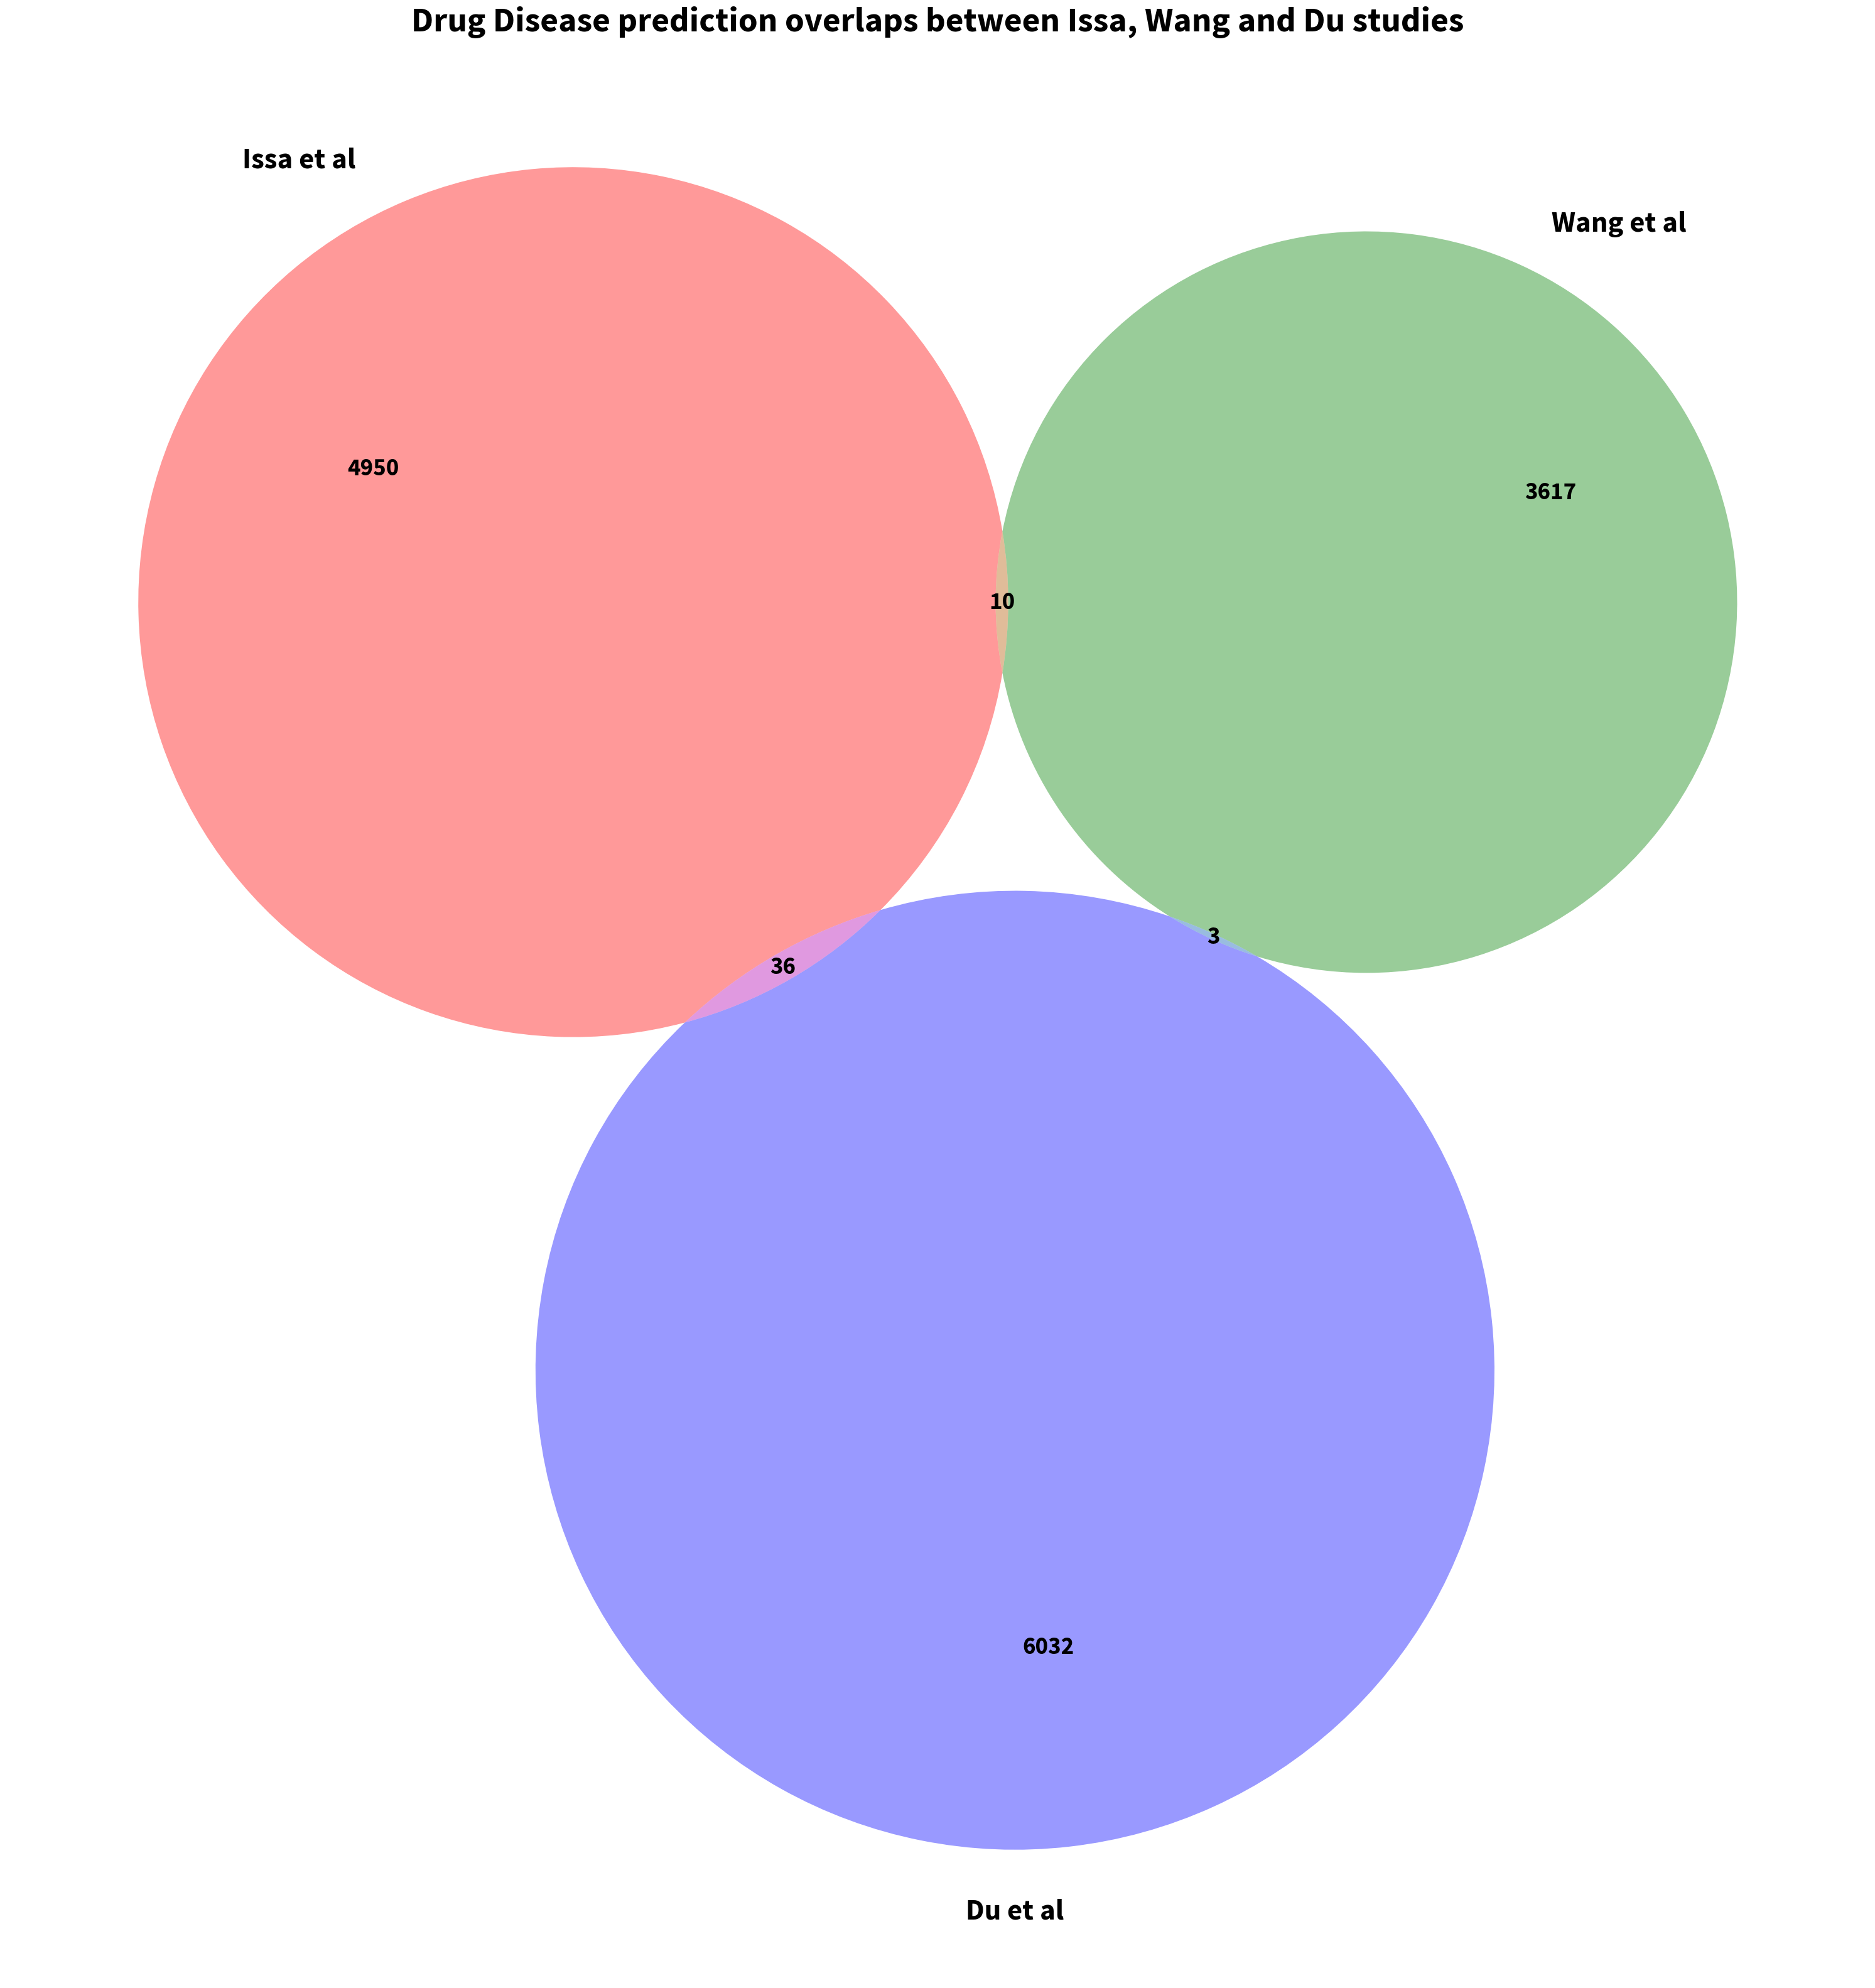

In [76]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


title_font = {'family' : 'Source Sans Pro', 
              'weight' : 'bold',
              'size'   : 40}


venn3([issa_drug_disease_set, wang_drug_disease_set, du_drug_disease_set], ('Issa et al', 'Wang et al', 'Du et al'))
plt.title("Drug Disease prediction overlaps between Issa, Wang and Du studies", fontdict=title_font)

plt.show()


In [77]:
pprint.pprint(issa_drug_disease_set.intersection(wang_drug_disease_set))

{('http://www.wikidata.org/entity/Q201872',
  'http://www.wikidata.org/entity/Q18554829'),
 ('http://www.wikidata.org/entity/Q221361',
  'http://www.wikidata.org/entity/Q1752571'),
 ('http://www.wikidata.org/entity/Q221361',
  'http://www.wikidata.org/entity/Q264118'),
 ('http://www.wikidata.org/entity/Q2465218',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q409192',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q410074',
  'http://www.wikidata.org/entity/Q1570013'),
 ('http://www.wikidata.org/entity/Q415220',
  'http://www.wikidata.org/entity/Q5464665'),
 ('http://www.wikidata.org/entity/Q425223',
  'http://www.wikidata.org/entity/Q47912'),
 ('http://www.wikidata.org/entity/Q944244',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q947266',
  'http://www.wikidata.org/entity/Q7514772')}


### predicted indications overlap Wang et al / Issa et al
* olanzapine for colon carcinoma
* clozapine for myelofibrosis
* clozapine for acute myeloid leukemia
* etodolac for migraine
* ketoprofen for migraine
* losartan for thrombophilia
* raloxifene for lung cancer
* penbutolol for migraine
* irbesartan for silent stroke

In [78]:
pprint.pprint(du_drug_disease_set.intersection(wang_drug_disease_set))

{('http://www.wikidata.org/entity/Q177094',
  'http://www.wikidata.org/entity/Q663041'),
 ('http://www.wikidata.org/entity/Q411188',
  'http://www.wikidata.org/entity/Q906492'),
 ('http://www.wikidata.org/entity/Q421304',
  'http://www.wikidata.org/entity/Q906492')}


### predicted indications Wang et al / Du et al
* imatinib for maturity-onset diabetes of the young
* aripiprazole for dystonia
* pramipexole for dystonia


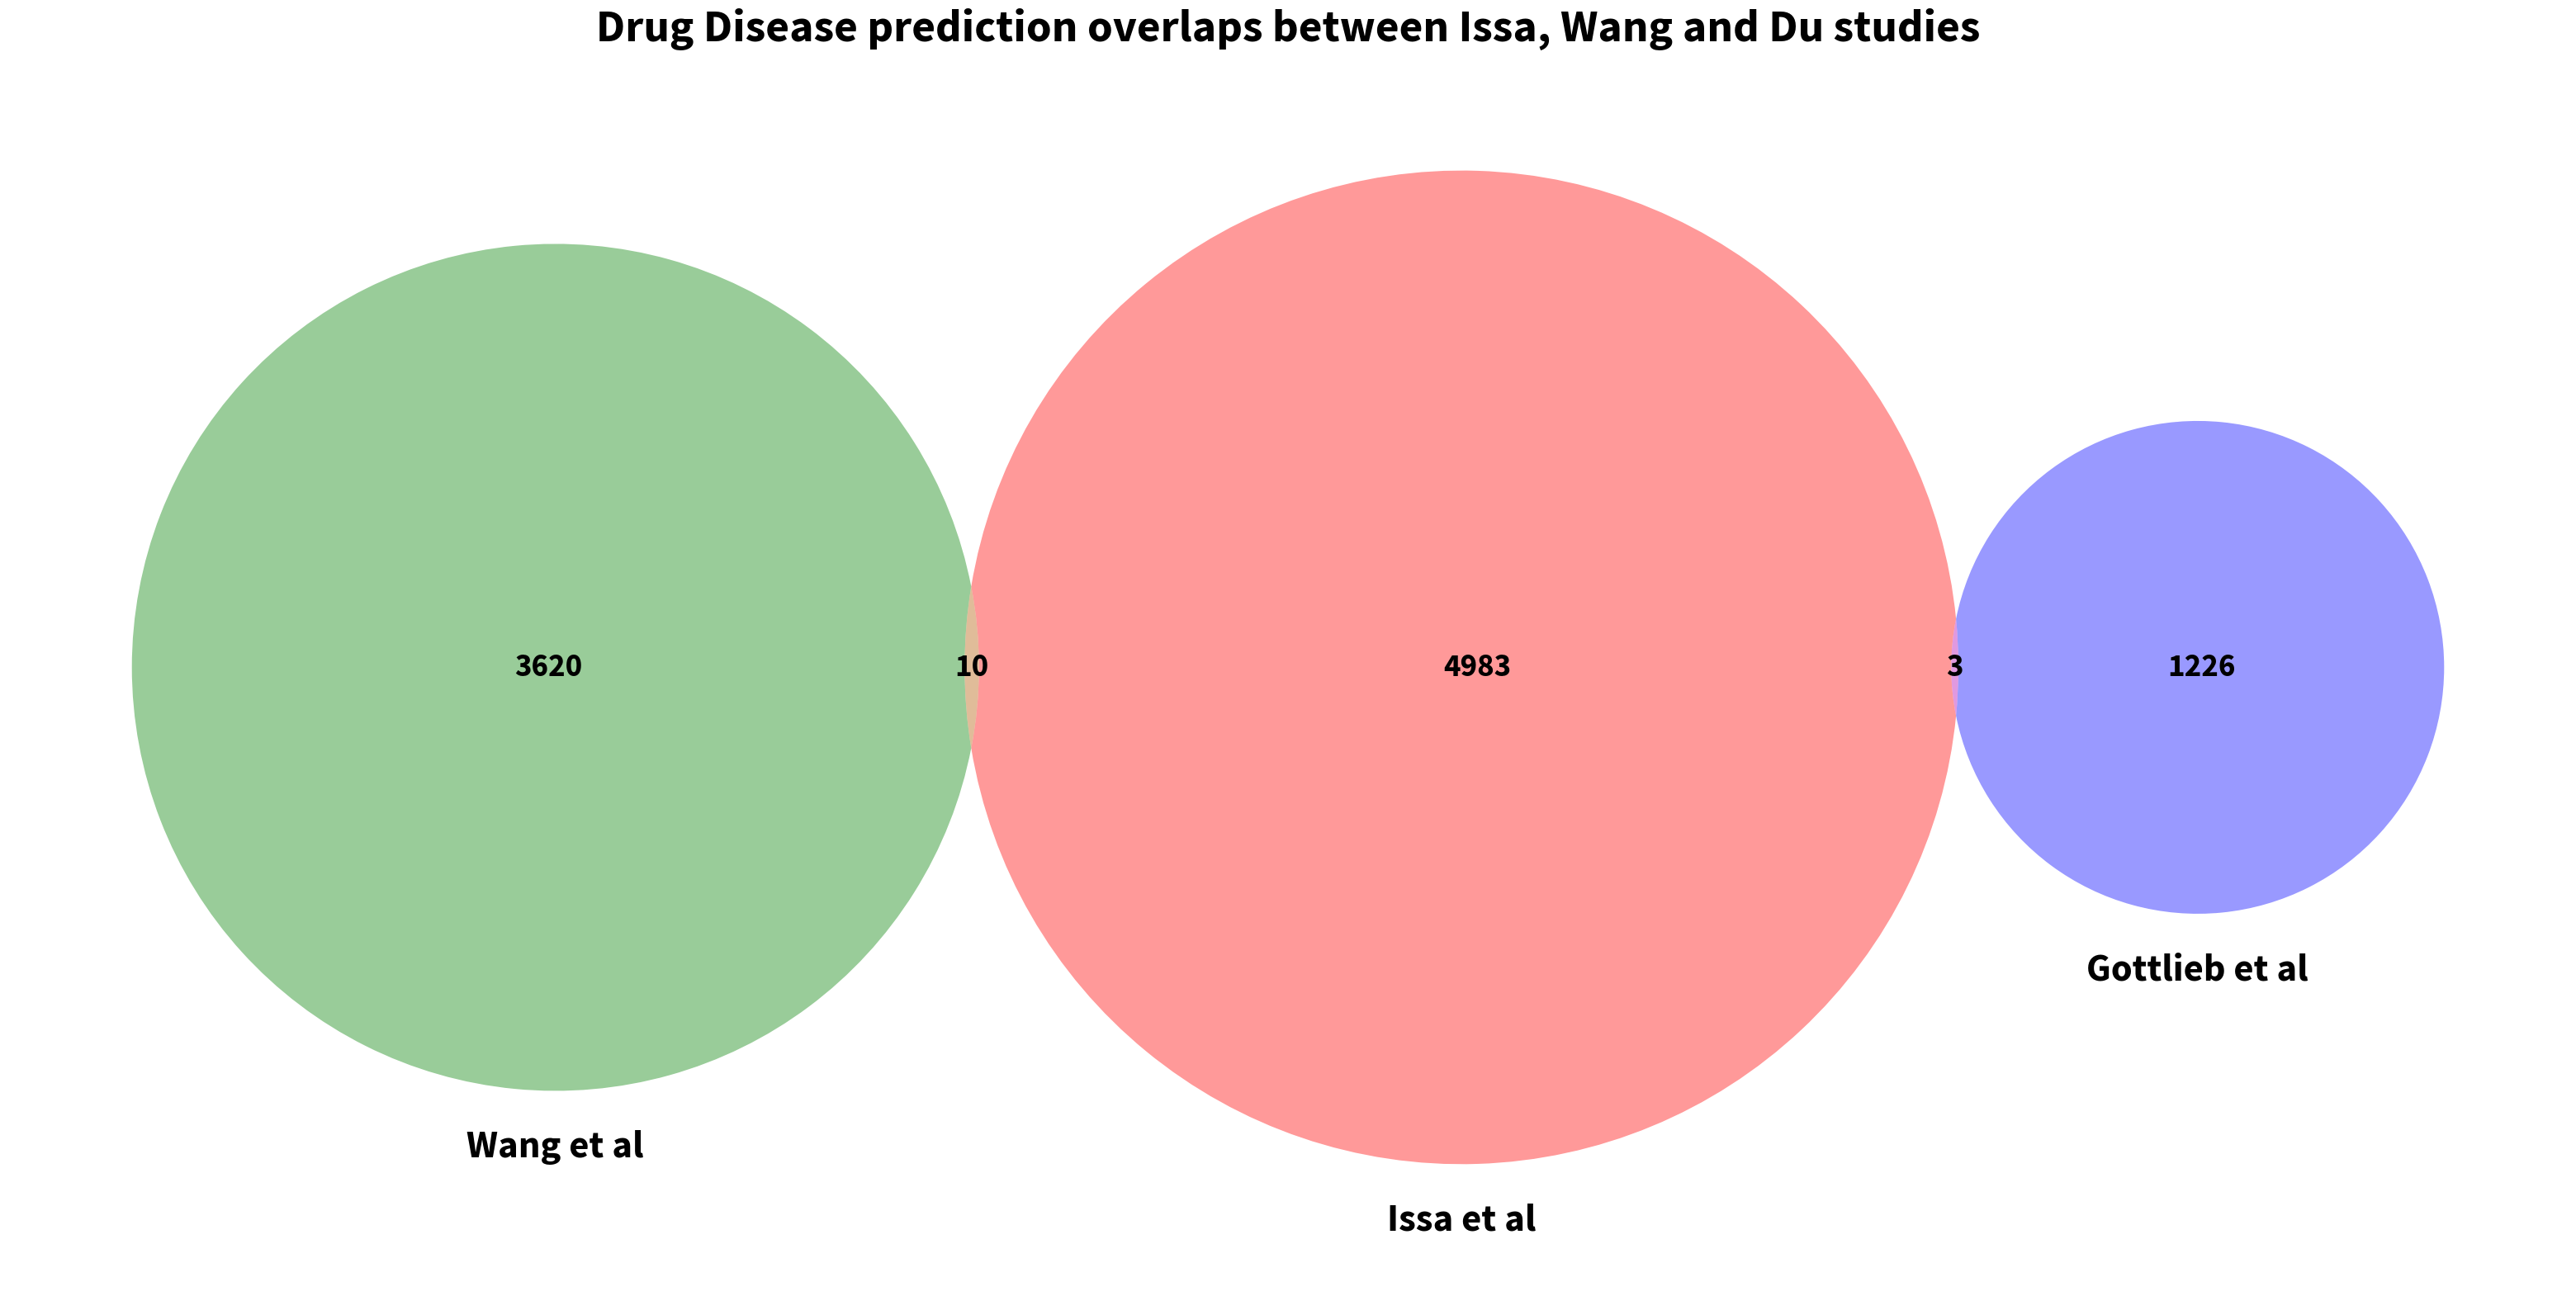

In [79]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


title_font = {'family' : 'Source Sans Pro', 
              'weight' : 'bold',
              'size'   : 40}


venn3([issa_drug_disease_set, wang_drug_disease_set, gottlieb_drug_disease_set], ('Issa et al', 'Wang et al', 'Gottlieb et al'))
plt.title("Drug Disease prediction overlaps between Issa, Wang and Du studies", fontdict=title_font)

plt.show()

compound overlap and inicated diseases

In [80]:
all_data = pd.DataFrame([], columns=['Disease', 'drug', 'prediction score', 
                                     'OMIM ID', 'disease_qid', 'drug_qid'])

gottlieb_data = exp_pred.append(repo_pred, ignore_index=True)
gottlieb_data.head()


,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label
0,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Acroosteolysis With Osteoporosis And Changes I...,http://www.wikidata.org/entity/Q632228,NaN,Hajdu-Cheney syndrome,NaN
1,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Osteoporosis,http://www.wikidata.org/entity/Q165328,NaN,osteoporosis,NaN
2,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Inclusion Body Myopathy With Early-Onset Paget...,NaN,NaN,NaN,NaN
3,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Paget Disease Of Bone; Pdb,http://www.wikidata.org/entity/Q2035074,NaN,Paget's disease of bone,NaN
4,0.997898,3-Methylfentanyl,Insensitivity To Pain With Hyperplastic Myelin...,NaN,http://www.wikidata.org/entity/Q2030844,NaN,3-methylfentanyl


In [81]:
gottlieb_data.shape

(12584, 7)

In [82]:
ref = pd.Series(['Gottlieb et al'] * len(gottlieb_data))
ref.rename('reference')
# gottlieb_data.add(ref, axis='index')
len(ref)

12584

In [83]:
gottlieb_data = pd.concat([gottlieb_data, ref], axis=1)


In [84]:
gottlieb_data.columns.values[-1] = 'reference'
gottlieb_data.head()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label,reference
0,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Acroosteolysis With Osteoporosis And Changes I...,http://www.wikidata.org/entity/Q632228,NaN,Hajdu-Cheney syndrome,NaN,Gottlieb et al
1,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Osteoporosis,http://www.wikidata.org/entity/Q165328,NaN,osteoporosis,NaN,Gottlieb et al
2,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Inclusion Body Myopathy With Early-Onset Paget...,NaN,NaN,NaN,NaN,Gottlieb et al
3,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Paget Disease Of Bone; Pdb,http://www.wikidata.org/entity/Q2035074,NaN,Paget's disease of bone,NaN,Gottlieb et al
4,0.997898,3-Methylfentanyl,Insensitivity To Pain With Hyperplastic Myelin...,NaN,http://www.wikidata.org/entity/Q2030844,NaN,3-methylfentanyl,Gottlieb et al


In [85]:
issa_data.columns

Index(['Uniprot Accession', 'PDB', 'DrugBank ID', 'Genotype MIM',
       'Phenotype MIM Number', 'Disease', 'DrugBank WD', 'OMIM WD',
       'wd_disease_label', 'wd_drug_label'],
      dtype='object')

In [86]:
print(gottlieb_data.dtypes)

Score               float64
Drug name            object
Disease name         object
disease_qid          object
drug_qid             object
wd_disease_label     object
wd_drug_label        object
reference            object
dtype: object


In [87]:
# issa_data_rearrange = pd.DataFrame(issa_data[]
all_data = None
for c, x in issa_data.iterrows():
    i = 0
    tf = pd.DataFrame([], columns=gottlieb_data.columns, dtype=gottlieb_data.dtypes)
    tf.loc[i, 'Disease name'] = x['Disease']
    tf.loc[i, 'disease_qid'] = x['OMIM WD']
    tf.loc[i, 'drug_qid'] = x['DrugBank WD']
    tf.loc[i, 'wd_disease_label'] = x['wd_disease_label']
    tf.loc[i, 'wd_drug_label'] = x['wd_drug_label']
    tf.loc[i, 'reference'] = 'Issa et al'
    tf.loc[i, 'Drug name'] = x['wd_drug_label']
#     print(tf.head())
#     print(tf.dtypes)
    
    if all_data is None:
        all_data = gottlieb_data.append(tf, ignore_index=True)
    else:
        all_data = all_data.append(tf, ignore_index=True)
    

In [88]:
all_data.tail()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label,reference
28962,NaN,5'-o-(n-(l-threonyl)-sulfamoyl)adenosine,"Diabetes mellitus, insulin-resistant, with aca...",http://www.wikidata.org/entity/Q29982025,http://www.wikidata.org/entity/Q27094297,Insulin-resistance syndrome type A,5'-o-(n-(l-threonyl)-sulfamoyl)adenosine,Issa et al
28963,NaN,pentosan polysulfate,"Hyperinsulinemic hypoglycemia, familial, 5, 60...",http://www.wikidata.org/entity/Q1535394,http://www.wikidata.org/entity/Q7165276,hyperinsulinemic hypoglycemia,pentosan polysulfate,Issa et al
28964,NaN,sphingosine,"Rabson-Mendenhall syndrome, 262190",http://www.wikidata.org/entity/Q3961685,http://www.wikidata.org/entity/Q46298,Rabson–Mendenhall syndrome,sphingosine,Issa et al
28965,NaN,telmisartan,"Hyperinsulinemic hypoglycemia, familial, 5, 60...",http://www.wikidata.org/entity/Q1535394,http://www.wikidata.org/entity/Q733186,hyperinsulinemic hypoglycemia,telmisartan,Issa et al
28966,NaN,latamoxef,"Leprechaunism, 246200",http://www.wikidata.org/entity/Q2467739,http://www.wikidata.org/entity/Q3827439,Donohue syndrome,latamoxef,Issa et al


In [89]:
du_annot_data.columns

Index(['disease', 'omim', 'gene', 'chembl', 'disease_qid', 'wd_disease_label',
       'drug_qid', 'wd_drug_label'],
      dtype='object')

In [90]:
tf = pd.DataFrame([], columns=all_data.columns, dtype=all_data.dtypes)
for c, x in du_annot_data.iterrows():
    
    tmp = pd.DataFrame([], columns=all_data.columns, dtype=all_data.dtypes)
    i = 0
    tmp.loc[i, 'Disease name'] = x['disease']
    tmp.loc[i, 'disease_qid'] = x['disease_qid']
    tmp.loc[i, 'drug_qid'] = x['drug_qid']
    tmp.loc[i, 'wd_disease_label'] = x['wd_disease_label']
    tmp.loc[i, 'wd_drug_label'] = x['wd_drug_label']
    tmp.loc[i, 'reference'] = 'Du et al'
    tmp.loc[i, 'Drug name'] = x['wd_drug_label']
#     print(tf.head())
#     print(tf.dtypes)
    
    tf = tf.append(tmp, ignore_index=True)
    
all_data = all_data.append(tf, ignore_index=True)

In [91]:
all_data.shape

(35837, 8)

In [92]:
all_data.tail()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label,reference
35832,NaN,GSK2606414,Wolcott-Rallison syndrome,http://www.wikidata.org/entity/Q8029730,http://www.wikidata.org/entity/Q15409439,Wolcott–Rallison syndrome,GSK2606414,Du et al
35833,NaN,"5-[2,4-dihydroxy-6-(4-nitrophenoxy)phenyl]-N-(...",Wolcott-Rallison syndrome,http://www.wikidata.org/entity/Q8029730,http://www.wikidata.org/entity/Q27457049,Wolcott–Rallison syndrome,"5-[2,4-dihydroxy-6-(4-nitrophenoxy)phenyl]-N-(...",Du et al
35834,NaN,bropirimine,"Xanthinuria, type I",http://www.wikidata.org/entity/Q1476965,http://www.wikidata.org/entity/Q4975364,xanthinuria,bropirimine,Du et al
35835,NaN,febuxostat,"Xanthinuria, type I",http://www.wikidata.org/entity/Q1476965,http://www.wikidata.org/entity/Q417296,xanthinuria,febuxostat,Du et al
35836,NaN,(4R)-4-hydroxy-1-[(3-methylisoxazol-5-yl)acety...,von Hippel-Lindau syndrome,http://www.wikidata.org/entity/Q741315,http://www.wikidata.org/entity/Q27462317,von Hippel-Lindau disease,(4R)-4-hydroxy-1-[(3-methylisoxazol-5-yl)acety...,Du et al


In [93]:
wang_data.columns

Index(['Disease', 'drug', 'prediction score', 'OMIM ID', 'drug_qid',
       'disease_qid', 'wd_drug_label', 'wd_disease_label'],
      dtype='object')

In [94]:
tf = pd.DataFrame([], columns=all_data.columns, dtype=all_data.dtypes)
for c, x in wang_data.iterrows():
    
    tmp = pd.DataFrame([], columns=all_data.columns, dtype=all_data.dtypes)
    i = 0
    tmp.loc[i, 'Disease name'] = x['Disease']
    tmp.loc[i, 'disease_qid'] = x['disease_qid']
    tmp.loc[i, 'drug_qid'] = x['drug_qid']
    tmp.loc[i, 'wd_disease_label'] = x['wd_disease_label']
    tmp.loc[i, 'wd_drug_label'] = x['wd_drug_label']
    tmp.loc[i, 'reference'] = 'Wang et al'
    tmp.loc[i, 'Drug name'] = x['drug']
    tmp.loc[i, 'Score'] = x['prediction score']
#     print(tf.head())
#     print(tf.dtypes)
    
    tf = tf.append(tmp, ignore_index=True)
    
all_data = all_data.append(tf, ignore_index=True)

all_data.shape

(41553, 8)

In [95]:
all_data.tail()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label,reference
41548,0.00448439,Gemcitabine,"Permanent Molars, Secondary Retention Of",http://www.wikidata.org/entity/Q18554358,http://www.wikidata.org/entity/Q414143,tooth ankylosis,gemcitabine,Wang et al
41549,0.00439302,Letrozole,"Macular Edema, Cystoid",http://www.wikidata.org/entity/Q18556331,http://www.wikidata.org/entity/Q194974,cystoid macular edema,letrozole,Wang et al
41550,0.00438111,Fosinopril,Mental And Growth Retardation With Amblyopia,NaN,http://www.wikidata.org/entity/Q27077716,NaN,fosinopril,Wang et al
41551,0.00437348,Ketorolac,"Thrombocythemia, Essential",http://www.wikidata.org/entity/Q1368780,http://www.wikidata.org/entity/Q2014797,Essential thrombocytosis,ketorolac,Wang et al
41552,0.00387731,Eletriptan,Premature Ovarian Failure 1; Pof1,http://www.wikidata.org/entity/Q647630,http://www.wikidata.org/entity/Q415032,premature ovarian failure,eletriptan,Wang et al


In [96]:
all_data.count()

Score               18300
Drug name           40232
Disease name        41553
disease_qid         27480
drug_qid            39239
wd_disease_label    27480
wd_drug_label       39228
reference           41553
dtype: int64

In [97]:
all_data.to_csv('drug_disease_all_predictions.csv')

In [98]:
len(all_data['drug_qid'].unique())


4256

In [99]:
overlapping_drugs = pd.DataFrame([], columns=all_data.columns)

value_counts = all_data['drug_qid'].value_counts()
for c, x in value_counts.items():
    if int(x) > 1:
        tmp = all_data.loc[all_data['drug_qid'] == c, :]
        
        if len(tmp['reference'].unique()) > 1:
            overlapping_drugs = overlapping_drugs.append(tmp, ignore_index=True)
    
#     print(c, x)
#     print(overlapping_drugs)
#     break

In [100]:
overlapping_drugs.shape


(20511, 8)

In [101]:
overlapping_drugs.count()

Score               14395
Drug name           20504
Disease name        20511
disease_qid         12493
drug_qid            20511
wd_disease_label    12493
wd_drug_label       20504
reference           20511
dtype: int64

In [102]:
len(overlapping_drugs['drug_qid'].unique())

722

In [103]:
ddup = overlapping_drugs.drop_duplicates()
ddup.count()

Score               14395
Drug name           18322
Disease name        18329
disease_qid         11398
drug_qid            18329
wd_disease_label    11398
wd_drug_label       18322
reference           18329
dtype: int64

In [104]:
ddup.to_csv('same_compound_in_multiple_studies.csv')

In [105]:
print(len(ddup['disease_qid'].unique()))
len(ddup['Disease name'].unique())

427


626

In [140]:
keywords = ['cancer', 'carcinoma', 'leukemia', 'tumour', 'tumor', 'neoplasm', 'myoma', 'blastoma', 'lymphoma',
           'melanoma', 'glioma', 'sarcoma', 'fibromatosis', 'myeloma', 'neoplasm', 'myelofibrosis', 
            'thrombocythemia, essential', 'mycosis fungoides', 'myeloproliferative', 'pheochromocytoma',
           'neoplasia']

wo_cancers = pd.DataFrame([], columns=all_data.columns)

keep = set()

for x in ddup['Disease name'].unique():
    if any([True for y in keywords if y in x.lower()]):
        continue
    else:
        keep.add(x)
        
for c, x in ddup.iterrows():
    if x['Disease name'] in keep:
        wo_cancers = wo_cancers.append(ddup.loc[c, :], ignore_index=True)
    
wo_cancers.head()

,Score,Drug name,Disease name,disease_qid,drug_qid,wd_disease_label,wd_drug_label,reference
0,NaN,sunitinib,"Factor X deficiency, 227600",NaN,http://www.wikidata.org/entity/Q417542,NaN,sunitinib,Issa et al
1,NaN,sunitinib,"Quebec platelet disorder, 601709",http://www.wikidata.org/entity/Q7269853,http://www.wikidata.org/entity/Q417542,Quebec platelet disorder,sunitinib,Issa et al
2,NaN,sunitinib,"{Alzheimer disease, late-onset, susceptibility...",http://www.wikidata.org/entity/Q11081,http://www.wikidata.org/entity/Q417542,Alzheimer's disease,sunitinib,Issa et al
3,NaN,sunitinib,[Hyperproreninemia],NaN,http://www.wikidata.org/entity/Q417542,NaN,sunitinib,Issa et al
4,NaN,sunitinib,"Hyperuricemic nephropathy, familial juvenile 2...",http://www.wikidata.org/entity/Q18553626,http://www.wikidata.org/entity/Q417542,familial juvenile hyperuricemic nephropathy,sunitinib,Issa et al


In [141]:
wo_cancers.shape

(16003, 8)

In [142]:
wo_cancers.to_csv('predictions_without_cancers.csv')

In [143]:
len(wo_cancers['Disease name'].unique())

529

In [144]:
disease_query = '''
select distinct ?disease ?diseaseLabel ?doid ?child ?childLabel where {
  ?disease wdt:P699 ?doid .
  ?child wdt:P279 ?disease .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" . }
                                            
}
'''

r = wdi.wdi_core.WDItemEngine.execute_sparql_query(disease_query)

parent_class_map = {}
for x in r['results']['bindings']:
    parent_class_map.update({x['child']['value']: (x['disease']['value'], x['diseaseLabel']['value'])})

In [145]:
print(parent_class_map['http://www.wikidata.org/entity/Q5432932'])

('http://www.wikidata.org/entity/Q815819', 'Respiratory lung condition')


In [146]:
for c, x in wo_cancers.iterrows():
    if pd.isnull(x['disease_qid']):
        continue
    
    if x['disease_qid'] in parent_class_map:
        parent_qid, parent_label = parent_class_map[x['disease_qid']]

        wo_cancers.loc[c, 'disease_class_qid'] = parent_qid
        wo_cancers.loc[c, 'disease_class_label'] = parent_label
    


In [147]:
wo_cancers.shape

(16003, 10)

In [148]:
wo_cancers.to_csv('predictions_without_cancers.csv')

In [149]:
len(wo_cancers['disease_class_label'].unique())

224

In [150]:
pd.set_option('display.max_rows', 300)
print(wo_cancers['disease_class_label'].value_counts())
pd.reset_option('display.max_rows')

migraine                                                 667
brain disease                                            428
blood coagulation disease                                245
autosomal dominant disease                               223
osteosclerosis                                           187
syndrome                                                 176
synucleinopathy                                          167
nervous system disease                                   150
kidney disease                                           145
tauopathy                                                140
glaucoma                                                 133
coronary artery disease                                  131
neonatal period electroclinical syndrome                 125
lupus erythematosus                                      110
demyelinating disease                                    105
cerebrovascular disease                                   99
inherited genetic blood 